# Music Genre Classification

Classifying music genres using machine learning techniques

Using the well known GZTAN music dataset.


In [1]:
#

In [2]:
import os
import sys
import glob

import numpy as np
import scipy
import scipy.io.wavfile

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

%matplotlib inline

In [3]:
# figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20

In [4]:
# Dataset 
DATA_DIR = './data'
GENRES_DIR = './data/genres'
GENRES_LIST = ['blues', 'classical', 'country', 'disco', 'hiphop',
                'jazz', 'metal', 'pop', 'rock', 'reggae' ]

In [5]:
# Let's see how many there are for each
def print_files(root):
    for R, dirs, files in os.walk(root):
        print (R, ' ', len(files))

print_files(GENRES_DIR)

./data/genres   0
./data/genres/blues   200
./data/genres/classical   200
./data/genres/country   200
./data/genres/disco   200
./data/genres/hiphop   200
./data/genres/jazz   200
./data/genres/metal   200
./data/genres/pop   200
./data/genres/reggae   200
./data/genres/rock   200


So there are 200 files in each genre; really, there are only 100 .AU files and 100 .WAV files (which we converted from .AU) separately using `sox`.


In [6]:
# figure size
from pylab import rcParams
rcParams['figure.figsize'] = 15, 20

In [7]:
# Let's plot specgram for some files from each subdirectories
def plot_specgram(ax, fil):
    sample_rate, X = scipy.io.wavfile.read(fil)
    ax.specgram(X, Fs=sample_rate, xextent=(0, 30))  # upto 30 secs

def plot_specgrams(base_dir=GENRES_DIR):
    """ Plot a few spectrograms from genres
    """
    genres = GENRES_LIST   # ['classical', 'blues', 'rock', 'country', 'jazz', 'metal']
    NUM_FILES = 3
    
    plt.clf()
    plt.figure(figsize=(15,20))
    
    f, axes = plt.subplots(len(genres), NUM_FILES)
    
    for gix, genre in enumerate(genres):
        for ix, fn in enumerate(glob.glob(os.path.join(base_dir, genre, "*.wav"))):
            if ix == NUM_FILES:
                break
            axis = axes[gix, ix]
            axis.yaxis.set_major_formatter(EngFormatter())
            axis.set_title("%s song %i" % (genre, ix+1))
            plot_specgram(axis, fn)
            
    plt.tight_layout()  # ensure space between subplots
    plt.show()

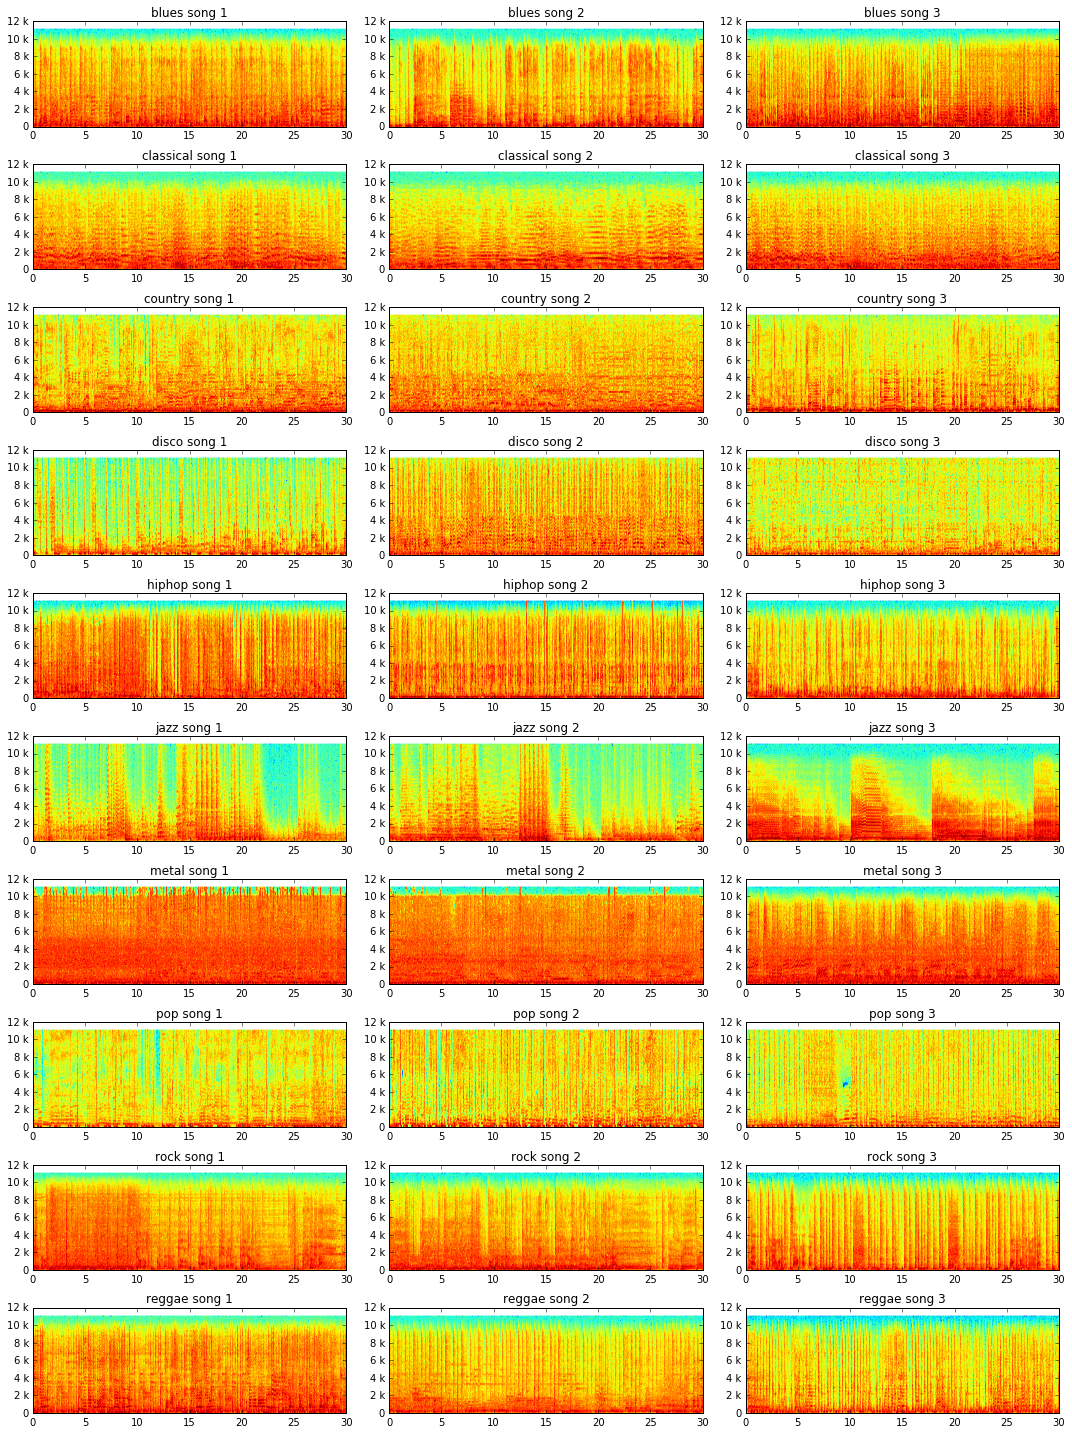

In [8]:
plot_specgrams()

The above figure clearly shows the differences in spectrograms for each genre. For example, Jazz songs really **look** different from Rock or Metal tracks. Metal tracks show a lot more _red_, perhaps indicating the anger they convey? 🤔😉

Let's see if we can plot the FFTs and see any differences.



In [9]:
# Create FFT

def create_fft(file):
    """ Creates FFT for the given audio file, and saves it
    """
    sample_rate, X = scipy.io.wavfile.read(file)
    fft_features = abs(scipy.fft(X))
    
    base_file, ext = os.path.splitext(file)
    fft_file = base_file + '.fft'
    # save FFT in a new file
    scipy.save(fft_file, fft_features)


In [17]:
# Plot the FFT for a given WAV file

def plot_wav_fft(wav_file, desc=None):
    '''  Plots the FFT for the given wav filename
    '''
    plt.figure(num=None, figsize=(6,4))
    
    # generate FFT
    sample_rate, X = scipy.io.wavfile.read(wav_file)
    spectrum = np.fft.fft(X)
    freq = np.fft.fftfreq(len(X), 1.0 / sample_rate)
    
    plt.subplot(211)
    num_samples = 400.0
    plt.xlim(0, num_samples / sample_rate)
    plt.xlabel("time [s]")
    plt.title(desc or wav_file)
    plt.plot(np.arange(num_samples) / sample_rate, X[:num_samples])
    plt.grid(True)
    
    plt.subplot(212)
    plt.xlim(0, 5000)
    plt.xlabel("freq [Hz]")
    plt.xticks(np.arange(5) * 1000)
    if desc:
        desc = desc.strip()
        fft_desc = desc[0].lower() + desc[1:]
    else:
        fft_desc = wav_file
    plt.title("FFT of %s" % fft_desc)
    plt.plot(freq, abs(spectrum), linewidth=5)
    plt.grid(True)
    
    plt.tight_layout()
    
    # save figure?
    # rel_filename = os.path.split(wav_file)[1]
    # plt.savefig("%s_wav_fft.png" % os.path.splitext(rel_filename)[0],
               # bbox_inches='tight')
    
    plt.show()


/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


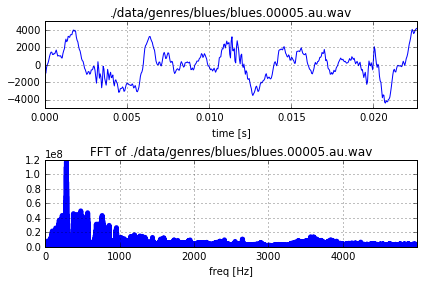

In [16]:
# Let's try a sample file

sample_file = GENRES_DIR + '/' + GENRES_LIST[0] + '/blues.00005.au.wav'  

create_fft(sample_file)
plot_wav_fft(sample_file)

Great, we can see the time-domain and frequency-domain representation of the wav file.

Let's now create FFTs for *all tracks* and save them for future, for the entire dataset. This may take a while!


In [24]:
# convert entire dataset to FFT

# let's create a progress bar
from pyprind import ProgBar


def create_fft_dataset(base_dir):
    '''  Create and save FFT for all the WAV files in the dataset
    '''
    print('Creating FFT for: ', base_dir)
    for path, dirs, files in os.walk(base_dir):
        progbar = ProgBar(len(files) // 2)   # total number of WAV files
        for f in files:
            if f.endswith('wav'):
                fullpath = os.path.join(path, f)
                fbase = os.path.splitext(fullpath)[0]
                # create and save FFT
                create_fft(fullpath)
                progbar.update()


In [25]:
# lets give it a try:
create_fft_dataset(GENRES_DIR + '/' + GENRES_LIST[0])


0%                          100%
[                              ]

Creating FFT for:  ./data/genres/blues


[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:13


In [28]:
# OK, Blues is done, so lets create FFTs for other genres

# This will take a while!
for genre in GENRES_LIST[1:]:  # Skip the Blues since we created FFTs there already
    gen_dir = os.path.join(GENRES_DIR, genre)
    print (">>> ", gen_dir, "\n")
    create_fft_dataset(gen_dir)

0%                          100%
[                              ]

>>>  ./data/genres/classical 

Creating FFT for:  ./data/genres/classical


[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:04
0%                          100%
[                              ]

>>>  ./data/genres/country 

Creating FFT for:  ./data/genres/country


[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:03
0%                          100%
[                              ]

>>>  ./data/genres/disco 

Creating FFT for:  ./data/genres/disco


[##############################] | ETA: 00:00:00
Total time elapsed: 00:01:00
0%                          100%
[                              ]

>>>  ./data/genres/hiphop 

Creating FFT for:  ./data/genres/hiphop


[##############################] | ETA: 00:00:00
Total time elapsed: 00:01:36
0%                          100%
[                              ]

>>>  ./data/genres/jazz 

Creating FFT for:  ./data/genres/jazz


[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:05
0%                          100%
[                              ]

>>>  ./data/genres/metal 

Creating FFT for:  ./data/genres/metal


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:50
0%                          100%
[                              ]

>>>  ./data/genres/pop 

Creating FFT for:  ./data/genres/pop


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:08
0%                          100%
[                              ]

>>>  ./data/genres/rock 

Creating FFT for:  ./data/genres/rock


[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:13
0%                          100%
[                              ]

>>>  ./data/genres/reggae 

Creating FFT for:  ./data/genres/reggae


[##############################] | ETA: 00:00:00
Total time elapsed: 00:01:02


## Using FFT for Genre Classification

From now on, we can simply read the FFT files and use that for classification

In [35]:
# read the FFT files for a genre

def read_fft(genre_list, base_dir=GENRES_DIR, num_samples=3000):
    ''' Read FFT files from each of the genre in the genre list
        Return numpy arrays for Label and FFT
        
    '''
    X = []   # FFT list
    y = []   # label list
    for label, genre in enumerate(genre_list):
        genre_dir = os.path.join(base_dir, genre, "*.fft.npy")
        files     = glob.glob(genre_dir)
        assert(files), genre_dir
        
        # progress bar
        print('Reading ', len(files), ' FFT files from:', genre)
        pg = ProgBar(len(files))
        
        for f in files:
            # load each FFT file
            fft_feature = np.load(f)
            # take only num_samples
            X.append(fft_feature[:num_samples])
            # append label
            y.append(label)
            
            #update prog bar
            pg.update()
    
    return np.array(X), np.array(y)


In [37]:
# test out on a couple of genres
x1, y1 = read_fft(['blues', 'country'], num_samples=2500)

print(x1.shape)
print(y1.shape)

del x1
del y1

0%                          100%
[################              ] | ETA: 00:00:00

Reading  100  FFT files from: blues


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[###############               ] | ETA: 00:00:00

Reading  100  FFT files from: country


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00


(200, 2500)
(200,)


Ok, this works. So let's read the entire dataset as FFT files.

In [39]:
genre_list = GENRES_LIST

X, y = read_fft(genre_list=genre_list, num_samples=5000)

print ('X shape:', X.shape)
print ('y shape:', y.shape)

0%                          100%
[#################             ] | ETA: 00:00:00

Reading  100  FFT files from: blues


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[########                      ] | ETA: 00:00:00

Reading  100  FFT files from: classical


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: country


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:01
0%                          100%
[####                          ] | ETA: 00:00:01

Reading  100  FFT files from: disco


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:01
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: hiphop


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: jazz


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: metal


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: pop


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: rock


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00
0%                          100%
[######                        ] | ETA: 00:00:00

Reading  100  FFT files from: reggae


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:00


X shape: (1000, 5000)
y shape: (1000,)


In [62]:
## Some plotting functions

#from matplotlib import pylab
#%pylab inline 

## Plot Confusion Matrix
def plot_confusion_matrix(cmatrix, genre_list, name, title):
    plt.figure(num=None, figsize=(10, 10))
    plt.matshow(cmatrix, fignum=False, cmap='Blues', vmin=0, vmax=1.0)
    ax = plt.axes()
    ax.set_xticks(range(len(genre_list)))
    ax.set_xticklabels(genre_list)
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_yticks(range(len(genre_list)))
    ax.set_yticklabels(genre_list)
    
    plt.title(title)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel('Predicted class')
    plt.ylabel('True class')
    
    plt.show()


In [60]:
# Plot Precision-Recall
def plot_precision_recall(auc_score, name, precision, recall, label=None):
    ''' Plots P/R curve
    '''
    plt.figure(num=None, figsize=(8, 5))
    plt.grid(True)
    plt.fill_between(recall, precision, alpha=0.5)
    plt.plot(recall, precision, lw=1)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision/Recall curve (AUC = %0.2f) / %s' % (auc_score, label))
    
    plt.show()


In [42]:
# Plot ROC 
def plot_roc(auc_score, name, tpr, fpr, label=None):
    ''' Plots ROC 
    '''
    plt.figure(num=None, figsize=(8, 5))
    plt.grid(True)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)  # False +ve, True +ve
    plt.fill_between(fpr, tpr, alpha=0.5)
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False +ve Rate')
    plt.ylabel('True +ve Rate')
    plt.title('ROC curve (AUC = %0.2f) / %s' % (auc_score, label),
             verticalalignment='bottom')
    plt.legend(loc='lower right')
    
    plt.show()

OK, now we are ready to train a Classifier. Let's try a simple **Logistic Regression Classifier**



In [43]:
from collections import defaultdict

from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import auc
from sklearn.cross_validation import ShuffleSplit

from sklearn.metrics import confusion_matrix

# Create a classifier Model
def create_logreg_model():
    '''  Creates and returns a Logistic Regression Classifier
    '''
    from sklearn.linear_model.logistic import LogisticRegression
    clf = LogisticRegression()
    return clf



/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
## Train the model

def train_model(clf, X, Y, name, plot=False):
    '''  Train the specified clf classifier
    X:  input dataset
    Y:  labels
    
    '''
    
    labels = np.unique(Y)
    
    # cross validator Train/Test
    cv = ShuffleSplit(n=len(X),
                     n_iter=3,
                     test_size=0.3,
                     random_state=0)
    
    train_errors = []
    test_errors  = []
    scores       = []
    
    pr_scores  = defaultdict(list)  # Precision/Recall scores
    precisions, recalls, thresholds = defaultdict(list), defaultdict(list), defaultdict(list)
    roc_scores = defaultdict(list)  # ROC scores
    tprs, fprs = defaultdict(list), defaultdict(list)  # True +ve, False +ve
    
    clfs          = []    # classifier list
    conf_matrices = []    # confusion matrix list
    
    for train, test in cv:
        # split Train/Test
        X_train, y_train = X[train], Y[train]
        X_test,  y_test  = X[test],  Y[test]
        
        # fit the model
        clf.fit(X_train, y_train)
        clfs.append(clf)   # for later calcs
        
        # get scores
        train_score = clf.score(X_train, y_train)
        test_score  = clf.score(X_test, y_test)
        scores.append(test_score)
        
        # save
        train_errors.append(1 - train_score)
        test_errors.append(1 - test_score)
        
        # predict
        y_pred = clf.predict(X_test)
        # confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices.append(cm)
        
    for label in labels:
        y_label_test = np.asarray(y_test == label, dtype=int)
        proba = clf.predict_proba(X_test)
        proba_label = proba[:, label]
        
        # get p/r curve
        precision, recall, pr_thresholds = precision_recall_curve(y_label_test,
                                                                  proba_label)
        # save scores
        pr_scores[label] .append(auc(recall, precision))
        precisions[label].append(precision)
        recalls[label]   .append(recall)
        thresholds[label].append(pr_thresholds)
        
        # get ROC curve
        fpr, tpr, roc_thresholds = roc_curve(y_label_test, 
                                            proba_label)
        # save
        roc_scores[label].append(auc(fpr, tpr))
        tprs[label]      .append(tpr)
        fprs[label]      .append(fpr)
        
    if plot:
        for label in labels:
            print('Plotting %s' % genre_list[label])
            scores_to_sort = roc_scores[label]
            median = np.argsort(scores_to_sort)[len(scores_to_sort) / 2]
            
            desc = "%s %s" % (name, genre_list[label])
            # plot P/R
            plot_precision_recall(pr_scores[label][median],
                                 desc,
                                 precisions[label][median],
                                 recalls[label][median],
                                 label='%s vs rest' % genre_list[label])
            # plot ROC
            plot_roc(roc_scores[label][median],
                    desc,
                    tprs[label][median],
                    fprs[label][median],
                    label='%s vs rest' % genre_list[label])
        
    # all_pr_scores = np.asarray(pr_scores.values()).flatten()
    # summary = (np.mean(scores), np.std(scores), np.mean(all_pr_scores), np.std(all_pr_scores))
    # print("%.3f\t%.3f\t%.3f\t%.3f\t" % summary)
    print("%.3f\t%.3f\t" % (np.mean(scores), np.std(scores)) )
    
    return np.mean(train_errors), np.mean(test_errors), np.asarray(conf_matrices)


Plotting blues


/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:80: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


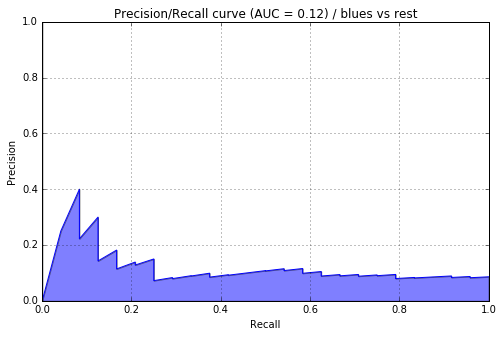

/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


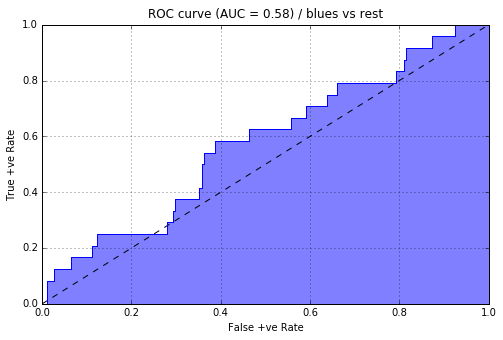

Plotting classical


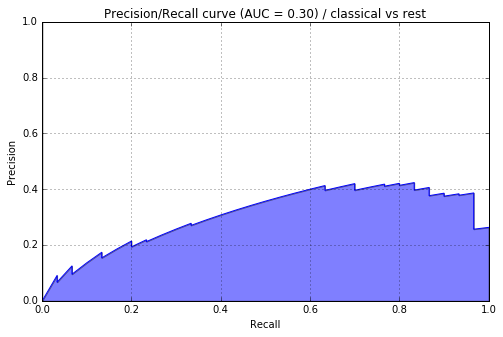

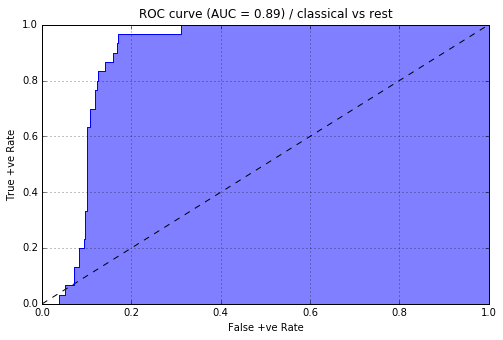

Plotting country


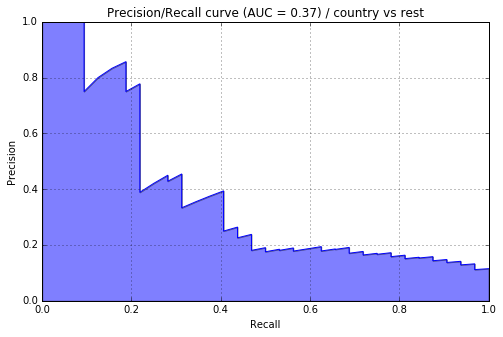

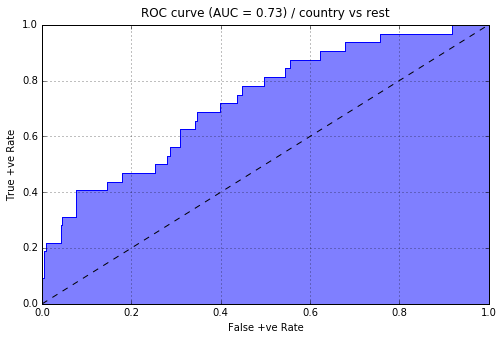

Plotting disco


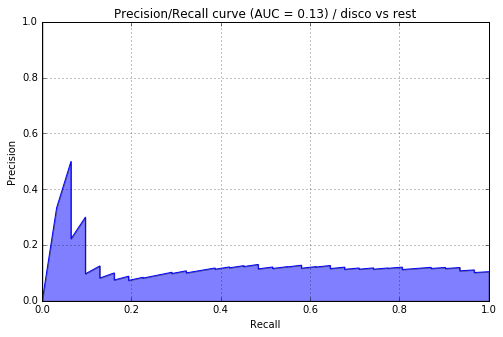

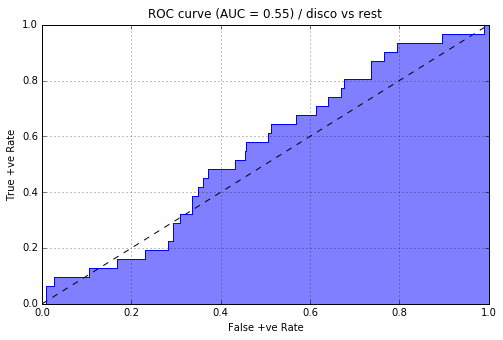

Plotting hiphop


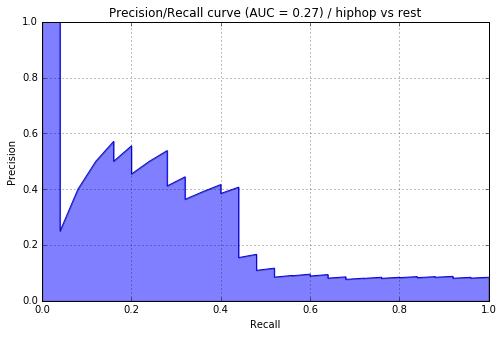

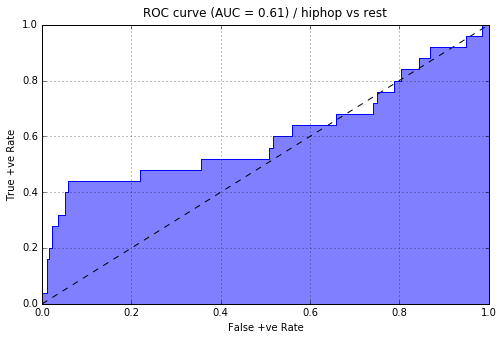

Plotting jazz


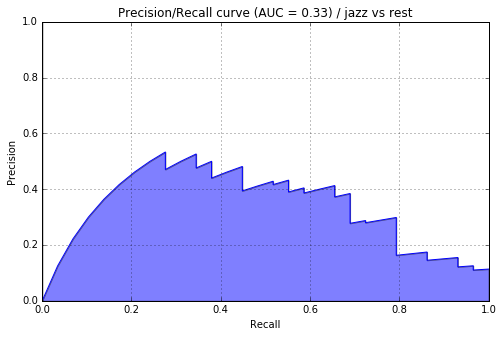

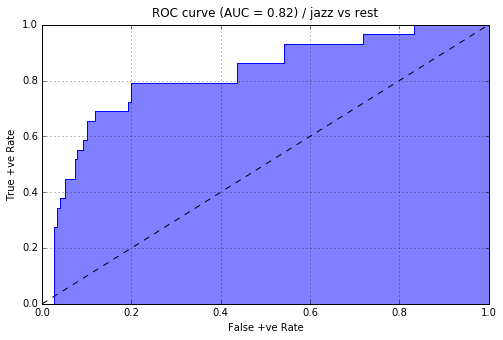

Plotting metal


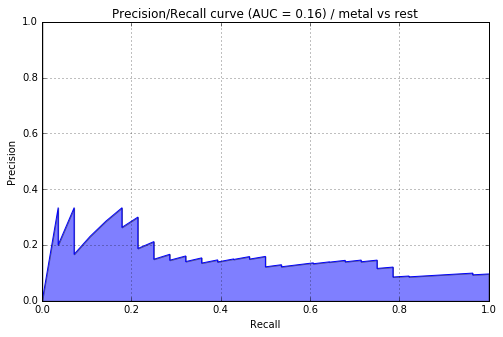

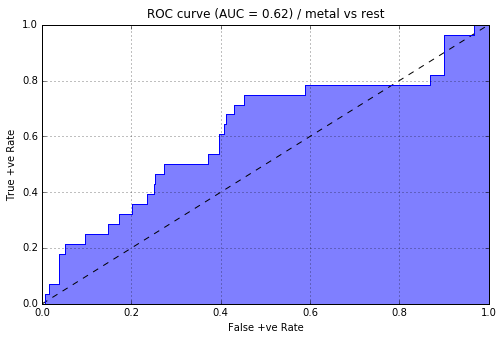

Plotting pop


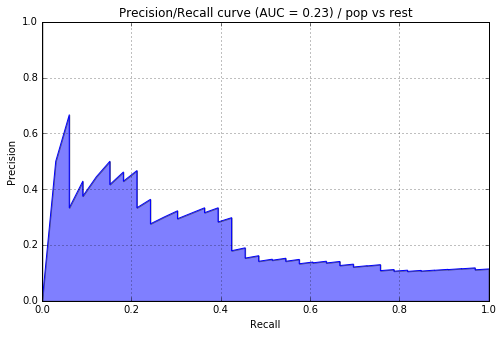

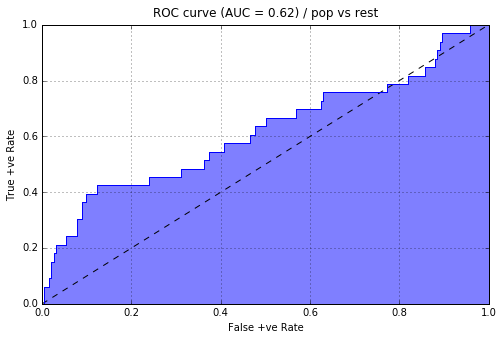

Plotting rock


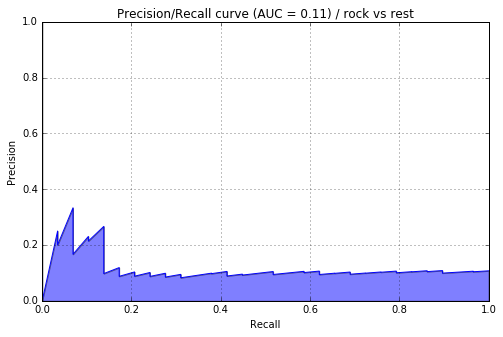

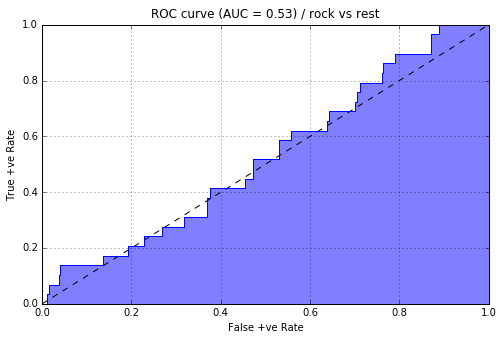

Plotting reggae


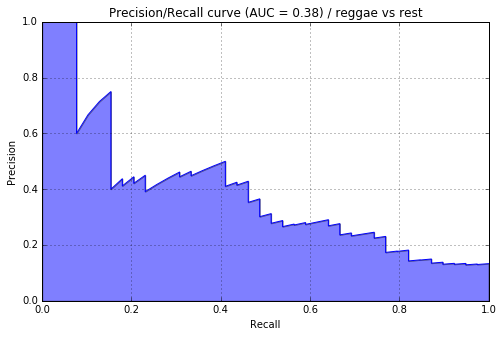

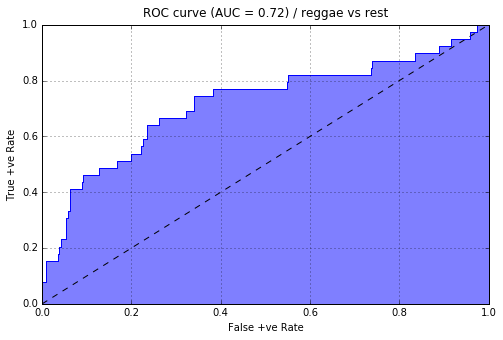

0.326	0.017	


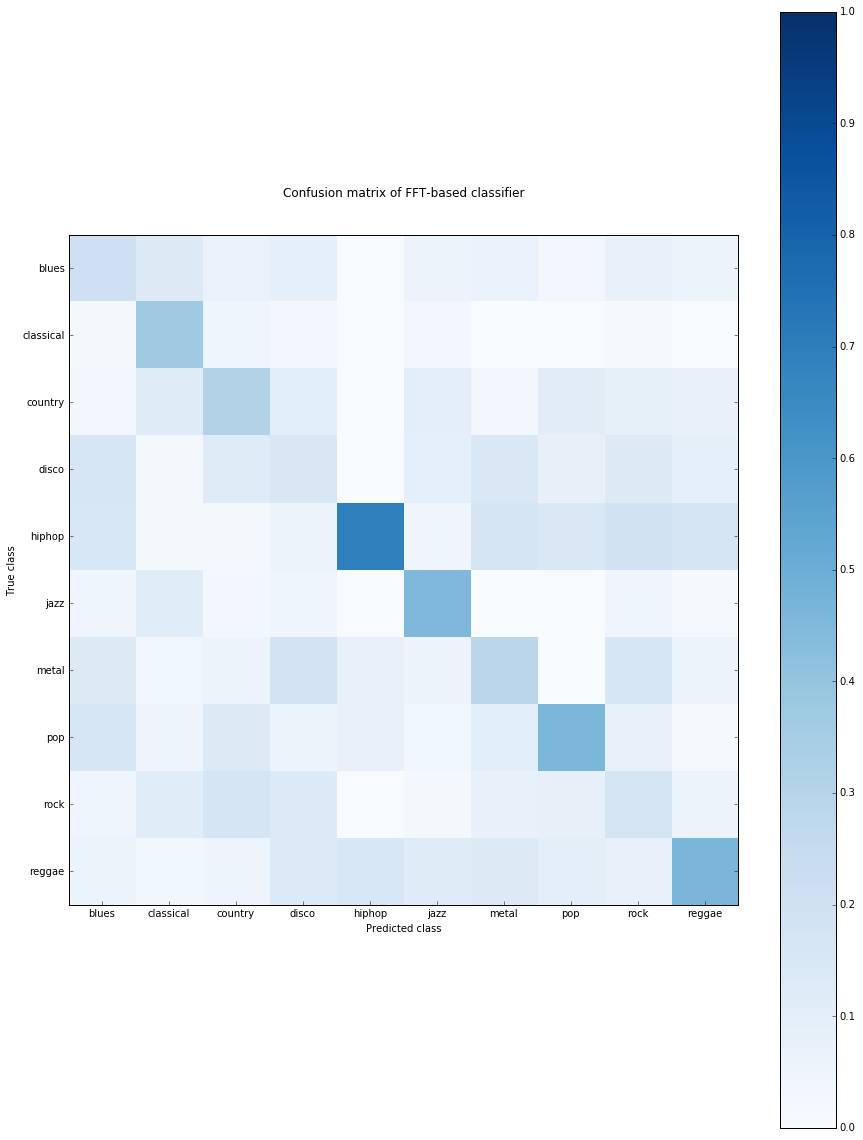

In [57]:
# Now run the classifier

clf = create_logreg_model()

train_avg, test_avg, cms = train_model(clf, 
                                      X, 
                                      y, 
                                      "Log Reg FFT", plot=True)

cm_avg = np.mean(cms, axis=0)
cm_norm = cm_avg / np.sum(cm_avg, axis=0)

plot_confusion_matrix(cm_norm, genre_list, "fft", 
                     "Confusion matrix of FFT-based classifier")

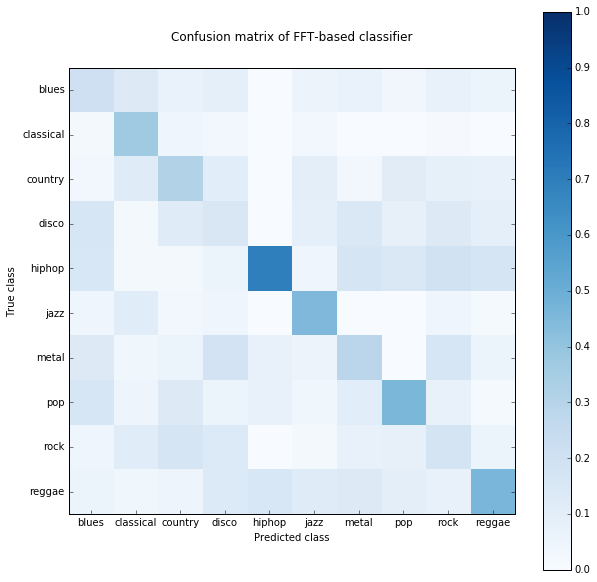

In [63]:
plot_confusion_matrix(cm_norm, genre_list, "fft", 
                     "Confusion matrix of FFT-based classifier")

As can be seen from the confusion matrix, some genres (**hiphop, jazz, pop, reggae**) are classified better than others. 

For a perfect classifier, we'd see a dark diagonal. 

So - perhaps this FFT classifier is not that great. There are ways to make it better. 

# Using Mel Frequency Cepstral Coefficients

Using simple FFTs, we got only average results for most genres. Let's see if we can get better results using MFCC classification. 

The **Mel Frequency Cepstrum (MFC)** encodes the power spectrum of sound, which is  power of each frequency the sound contains.  MFC is calculated as the _FFT of the log of signal's spectrum_. 

Let's use the **TalkBox Toolkit** to calculate the MFCC.

### NOTE: scikits.talkbox  was available only for Python2, not Python3

So I have temporarily **copied** relevant MFCC code from https://github.com/cournape/talkbox/tree/master/scikits/talkbox/features 
into file called `talkbox.py` locally, and made minor changes to make this work



In [69]:
# Get the TalkBox Scikit
import talkbox
from talkbox import mfcc


In [ ]:
# try it out
sample_rate, X = scipy.io.wavfile.read(sample_file)
ceps, mspec, spec = mfcc(X)
print(ceps.shape)

Ok, so this works.

Let's convert the entire dataset to MFCC.


In [114]:
## Write the CEPS
def write_ceps(ceps, fn):
    """
    Write the MFCC to separate files to speed up processing.
    """
    base_fn, ext = os.path.splitext(fn)
    data_fn = base_fn + ".ceps"
    np.save(data_fn, ceps)
    #print("Written %s"%data_fn)
    
def create_ceps(fn):
    sample_rate, X = scipy.io.wavfile.read(fn)

    ceps, mspec, spec = mfcc(X)
    write_ceps(ceps, fn)
    
def read_ceps(genre_list, base_dir=GENRES_DIR):
    X = []
    y = []
    for label, genre in enumerate(genre_list):
        for fn in glob.glob(os.path.join(base_dir, genre, "*.ceps.npy")):
            ceps = np.load(fn)
            num_ceps = len(ceps)
            # dampen the CEPS -- by taking 10% off from beginning and end of track
            X.append(
                np.mean(ceps[int(num_ceps / 10):int(num_ceps * 9 / 10)], axis=0))
            y.append(label)

    return np.array(X), np.array(y)

In [84]:
def create_ceps_dataset(base_dir):
    '''  Create and save cepstral MFCC for all the WAV files in the dataset
    '''
    print('Creating MFCC ceps for: ', base_dir)
    for path, dirs, _ in os.walk(base_dir):
        print(dirs)
        for d in dirs:
            glob_wav = os.path.join(path + '/' + d, "*.wav")
            files = glob.glob(glob_wav)
            print('In ', d, ': wav files', len(files))
            progbar = ProgBar(len(files))
            for f in files:
                create_ceps(f)
                progbar.update()


In [85]:
# test it out
create_ceps_dataset(GENRES_DIR)

0%                          100%
[                              ]

Creating MFCC ceps for:  ./data/genres
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
In  blues : wav files 100
Written ./data/genres/blues/blues.00000.au.ceps
Written ./data/genres/blues/blues.00001.au.ceps


[#                             ] | ETA: 00:00:07

Written ./data/genres/blues/blues.00002.au.ceps
Written ./data/genres/blues/blues.00003.au.ceps
Written ./data/genres/blues/blues.00004.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/blues/blues.00005.au.ceps
Written ./data/genres/blues/blues.00006.au.ceps
Written ./data/genres/blues/blues.00007.au.ceps


[###                           ] | ETA: 00:00:06

Written ./data/genres/blues/blues.00008.au.ceps
Written ./data/genres/blues/blues.00009.au.ceps
Written ./data/genres/blues/blues.00010.au.ceps
Written ./data/genres/blues/blues.00011.au.ceps


[####                          ] | ETA: 00:00:06

Written ./data/genres/blues/blues.00012.au.ceps
Written ./data/genres/blues/blues.00013.au.ceps
Written ./data/genres/blues/blues.00014.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/blues/blues.00015.au.ceps
Written ./data/genres/blues/blues.00016.au.ceps
Written ./data/genres/blues/blues.00017.au.ceps
Written ./data/genres/blues/blues.00018.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/blues/blues.00019.au.ceps
Written ./data/genres/blues/blues.00020.au.ceps
Written ./data/genres/blues/blues.00021.au.ceps
Written ./data/genres/blues/blues.00022.au.ceps


[########                      ] | ETA: 00:00:05

Written ./data/genres/blues/blues.00023.au.ceps
Written ./data/genres/blues/blues.00024.au.ceps
Written ./data/genres/blues/blues.00025.au.ceps
Written ./data/genres/blues/blues.00026.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/blues/blues.00027.au.ceps
Written ./data/genres/blues/blues.00028.au.ceps
Written ./data/genres/blues/blues.00029.au.ceps
Written ./data/genres/blues/blues.00030.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/blues/blues.00031.au.ceps
Written ./data/genres/blues/blues.00032.au.ceps
Written ./data/genres/blues/blues.00033.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/blues/blues.00034.au.ceps
Written ./data/genres/blues/blues.00035.au.ceps
Written ./data/genres/blues/blues.00036.au.ceps
Written ./data/genres/blues/blues.00037.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/blues/blues.00038.au.ceps
Written ./data/genres/blues/blues.00039.au.ceps
Written ./data/genres/blues/blues.00040.au.ceps
Written ./data/genres/blues/blues.00041.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/blues/blues.00042.au.ceps
Written ./data/genres/blues/blues.00043.au.ceps
Written ./data/genres/blues/blues.00044.au.ceps
Written ./data/genres/blues/blues.00045.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/blues/blues.00046.au.ceps
Written ./data/genres/blues/blues.00047.au.ceps
Written ./data/genres/blues/blues.00048.au.ceps
Written ./data/genres/blues/blues.00049.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/blues/blues.00050.au.ceps
Written ./data/genres/blues/blues.00051.au.ceps
Written ./data/genres/blues/blues.00052.au.ceps
Written ./data/genres/blues/blues.00053.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/blues/blues.00054.au.ceps
Written ./data/genres/blues/blues.00055.au.ceps
Written ./data/genres/blues/blues.00056.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/blues/blues.00057.au.ceps
Written ./data/genres/blues/blues.00058.au.ceps
Written ./data/genres/blues/blues.00059.au.ceps
Written ./data/genres/blues/blues.00060.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/blues/blues.00061.au.ceps
Written ./data/genres/blues/blues.00062.au.ceps
Written ./data/genres/blues/blues.00063.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/blues/blues.00064.au.ceps
Written ./data/genres/blues/blues.00065.au.ceps
Written ./data/genres/blues/blues.00066.au.ceps
Written ./data/genres/blues/blues.00067.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/blues/blues.00068.au.ceps
Written ./data/genres/blues/blues.00069.au.ceps
Written ./data/genres/blues/blues.00070.au.ceps
Written ./data/genres/blues/blues.00071.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/blues/blues.00072.au.ceps
Written ./data/genres/blues/blues.00073.au.ceps
Written ./data/genres/blues/blues.00074.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/blues/blues.00075.au.ceps
Written ./data/genres/blues/blues.00076.au.ceps
Written ./data/genres/blues/blues.00077.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/blues/blues.00078.au.ceps
Written ./data/genres/blues/blues.00079.au.ceps
Written ./data/genres/blues/blues.00080.au.ceps
Written ./data/genres/blues/blues.00081.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/blues/blues.00082.au.ceps
Written ./data/genres/blues/blues.00083.au.ceps
Written ./data/genres/blues/blues.00084.au.ceps
Written ./data/genres/blues/blues.00085.au.ceps


[###########################   ]

Written ./data/genres/blues/blues.00086.au.ceps
Written ./data/genres/blues/blues.00087.au.ceps
Written ./data/genres/blues/blues.00088.au.ceps
Written ./data/genres/blues/blues.00089.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/blues/blues.00090.au.ceps
Written ./data/genres/blues/blues.00091.au.ceps
Written ./data/genres/blues/blues.00092.au.ceps
Written ./data/genres/blues/blues.00093.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/blues/blues.00094.au.ceps
Written ./data/genres/blues/blues.00095.au.ceps
Written ./data/genres/blues/blues.00096.au.ceps
Written ./data/genres/blues/blues.00097.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/blues/blues.00098.au.ceps
Written ./data/genres/blues/blues.00099.au.ceps
In  classical : wav files 100
Written ./data/genres/classical/classical.00000.au.ceps
Written ./data/genres/classical/classical.00001.au.ceps


[#                             ] | ETA: 00:00:06

Written ./data/genres/classical/classical.00002.au.ceps
Written ./data/genres/classical/classical.00003.au.ceps
Written ./data/genres/classical/classical.00004.au.ceps
Written ./data/genres/classical/classical.00005.au.ceps


[###                           ] | ETA: 00:00:05

Written ./data/genres/classical/classical.00006.au.ceps
Written ./data/genres/classical/classical.00007.au.ceps
Written ./data/genres/classical/classical.00008.au.ceps
Written ./data/genres/classical/classical.00009.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/classical/classical.00010.au.ceps
Written ./data/genres/classical/classical.00011.au.ceps
Written ./data/genres/classical/classical.00012.au.ceps
Written ./data/genres/classical/classical.00013.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/classical/classical.00014.au.ceps
Written ./data/genres/classical/classical.00015.au.ceps
Written ./data/genres/classical/classical.00016.au.ceps
Written ./data/genres/classical/classical.00017.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/classical/classical.00018.au.ceps
Written ./data/genres/classical/classical.00019.au.ceps
Written ./data/genres/classical/classical.00020.au.ceps
Written ./data/genres/classical/classical.00021.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/classical/classical.00022.au.ceps
Written ./data/genres/classical/classical.00023.au.ceps
Written ./data/genres/classical/classical.00024.au.ceps
Written ./data/genres/classical/classical.00025.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/classical/classical.00026.au.ceps
Written ./data/genres/classical/classical.00027.au.ceps
Written ./data/genres/classical/classical.00028.au.ceps
Written ./data/genres/classical/classical.00029.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/classical/classical.00030.au.ceps
Written ./data/genres/classical/classical.00031.au.ceps
Written ./data/genres/classical/classical.00032.au.ceps
Written ./data/genres/classical/classical.00033.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/classical/classical.00034.au.ceps
Written ./data/genres/classical/classical.00035.au.ceps
Written ./data/genres/classical/classical.00036.au.ceps
Written ./data/genres/classical/classical.00037.au.ceps


[############                  ] | ETA: 00:00:03

Written ./data/genres/classical/classical.00038.au.ceps
Written ./data/genres/classical/classical.00039.au.ceps
Written ./data/genres/classical/classical.00040.au.ceps
Written ./data/genres/classical/classical.00041.au.ceps


/Users/aa/Developer/music_genre_classification/talkbox.py:220: RuntimeWarning: divide by zero encountered in log10
  mspec = np.log10(np.dot(spec, fbank.T))
[#############                 ] | ETA: 00:00:03

Written ./data/genres/classical/classical.00042.au.ceps
Written ./data/genres/classical/classical.00043.au.ceps
Written ./data/genres/classical/classical.00044.au.ceps
Written ./data/genres/classical/classical.00045.au.ceps


[##############                ] | ETA: 00:00:03

Written ./data/genres/classical/classical.00046.au.ceps
Written ./data/genres/classical/classical.00047.au.ceps
Written ./data/genres/classical/classical.00048.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/classical/classical.00049.au.ceps
Written ./data/genres/classical/classical.00050.au.ceps
Written ./data/genres/classical/classical.00051.au.ceps
Written ./data/genres/classical/classical.00052.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/classical/classical.00053.au.ceps
Written ./data/genres/classical/classical.00054.au.ceps
Written ./data/genres/classical/classical.00055.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/classical/classical.00056.au.ceps
Written ./data/genres/classical/classical.00057.au.ceps
Written ./data/genres/classical/classical.00058.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/classical/classical.00059.au.ceps
Written ./data/genres/classical/classical.00060.au.ceps
Written ./data/genres/classical/classical.00061.au.ceps
Written ./data/genres/classical/classical.00062.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/classical/classical.00063.au.ceps
Written ./data/genres/classical/classical.00064.au.ceps
Written ./data/genres/classical/classical.00065.au.ceps
Written ./data/genres/classical/classical.00066.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/classical/classical.00067.au.ceps
Written ./data/genres/classical/classical.00068.au.ceps
Written ./data/genres/classical/classical.00069.au.ceps
Written ./data/genres/classical/classical.00070.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/classical/classical.00071.au.ceps
Written ./data/genres/classical/classical.00072.au.ceps
Written ./data/genres/classical/classical.00073.au.ceps
Written ./data/genres/classical/classical.00074.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/classical/classical.00075.au.ceps
Written ./data/genres/classical/classical.00076.au.ceps
Written ./data/genres/classical/classical.00077.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/classical/classical.00078.au.ceps
Written ./data/genres/classical/classical.00079.au.ceps
Written ./data/genres/classical/classical.00080.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/classical/classical.00081.au.ceps
Written ./data/genres/classical/classical.00082.au.ceps
Written ./data/genres/classical/classical.00083.au.ceps
Written ./data/genres/classical/classical.00084.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/classical/classical.00085.au.ceps
Written ./data/genres/classical/classical.00086.au.ceps
Written ./data/genres/classical/classical.00087.au.ceps
Written ./data/genres/classical/classical.00088.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/classical/classical.00089.au.ceps
Written ./data/genres/classical/classical.00090.au.ceps
Written ./data/genres/classical/classical.00091.au.ceps
Written ./data/genres/classical/classical.00092.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/classical/classical.00093.au.ceps
Written ./data/genres/classical/classical.00094.au.ceps
Written ./data/genres/classical/classical.00095.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/classical/classical.00096.au.ceps
Written ./data/genres/classical/classical.00097.au.ceps
Written ./data/genres/classical/classical.00098.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/classical/classical.00099.au.ceps
In  country : wav files 100
Written ./data/genres/country/country.00000.au.ceps
Written ./data/genres/country/country.00001.au.ceps


[#                             ] | ETA: 00:00:06

Written ./data/genres/country/country.00002.au.ceps
Written ./data/genres/country/country.00003.au.ceps
Written ./data/genres/country/country.00004.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/country/country.00005.au.ceps
Written ./data/genres/country/country.00006.au.ceps
Written ./data/genres/country/country.00007.au.ceps


[###                           ] | ETA: 00:00:06

Written ./data/genres/country/country.00008.au.ceps
Written ./data/genres/country/country.00009.au.ceps
Written ./data/genres/country/country.00010.au.ceps


[####                          ] | ETA: 00:00:06

Written ./data/genres/country/country.00011.au.ceps
Written ./data/genres/country/country.00012.au.ceps
Written ./data/genres/country/country.00013.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/country/country.00014.au.ceps
Written ./data/genres/country/country.00015.au.ceps
Written ./data/genres/country/country.00016.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/country/country.00017.au.ceps
Written ./data/genres/country/country.00018.au.ceps
Written ./data/genres/country/country.00019.au.ceps


[#######                       ]

Written ./data/genres/country/country.00020.au.ceps
Written ./data/genres/country/country.00021.au.ceps
Written ./data/genres/country/country.00022.au.ceps
Written ./data/genres/country/country.00023.au.ceps


[########                      ] | ETA: 00:00:05

Written ./data/genres/country/country.00024.au.ceps
Written ./data/genres/country/country.00025.au.ceps
Written ./data/genres/country/country.00026.au.ceps
Written ./data/genres/country/country.00027.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/country/country.00028.au.ceps
Written ./data/genres/country/country.00029.au.ceps
Written ./data/genres/country/country.00030.au.ceps
Written ./data/genres/country/country.00031.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/country/country.00032.au.ceps
Written ./data/genres/country/country.00033.au.ceps
Written ./data/genres/country/country.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/country/country.00035.au.ceps
Written ./data/genres/country/country.00036.au.ceps
Written ./data/genres/country/country.00037.au.ceps
Written ./data/genres/country/country.00038.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/country/country.00039.au.ceps
Written ./data/genres/country/country.00040.au.ceps
Written ./data/genres/country/country.00041.au.ceps
Written ./data/genres/country/country.00042.au.ceps


[##############                ]

Written ./data/genres/country/country.00043.au.ceps
Written ./data/genres/country/country.00044.au.ceps
Written ./data/genres/country/country.00045.au.ceps
Written ./data/genres/country/country.00046.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/country/country.00047.au.ceps
Written ./data/genres/country/country.00048.au.ceps
Written ./data/genres/country/country.00049.au.ceps
Written ./data/genres/country/country.00050.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/country/country.00051.au.ceps
Written ./data/genres/country/country.00052.au.ceps
Written ./data/genres/country/country.00053.au.ceps
Written ./data/genres/country/country.00054.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/country/country.00055.au.ceps
Written ./data/genres/country/country.00056.au.ceps
Written ./data/genres/country/country.00057.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/country/country.00058.au.ceps
Written ./data/genres/country/country.00059.au.ceps
Written ./data/genres/country/country.00060.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/country/country.00061.au.ceps
Written ./data/genres/country/country.00062.au.ceps
Written ./data/genres/country/country.00063.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/country/country.00064.au.ceps
Written ./data/genres/country/country.00065.au.ceps
Written ./data/genres/country/country.00066.au.ceps
Written ./data/genres/country/country.00067.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/country/country.00068.au.ceps
Written ./data/genres/country/country.00069.au.ceps
Written ./data/genres/country/country.00070.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/country/country.00071.au.ceps
Written ./data/genres/country/country.00072.au.ceps
Written ./data/genres/country/country.00073.au.ceps
Written ./data/genres/country/country.00074.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/country/country.00075.au.ceps
Written ./data/genres/country/country.00076.au.ceps
Written ./data/genres/country/country.00077.au.ceps
Written ./data/genres/country/country.00078.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/country/country.00079.au.ceps
Written ./data/genres/country/country.00080.au.ceps
Written ./data/genres/country/country.00081.au.ceps
Written ./data/genres/country/country.00082.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/country/country.00083.au.ceps
Written ./data/genres/country/country.00084.au.ceps
Written ./data/genres/country/country.00085.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/country/country.00086.au.ceps
Written ./data/genres/country/country.00087.au.ceps
Written ./data/genres/country/country.00088.au.ceps
Written ./data/genres/country/country.00089.au.ceps
Written ./data/genres/country/country.00090.au.ceps
Written ./data/genres/country/country.00091.au.ceps
Written ./data/genres/country/country.00092.au.ceps


[############################# ]

Written ./data/genres/country/country.00093.au.ceps
Written ./data/genres/country/country.00094.au.ceps
Written ./data/genres/country/country.00095.au.ceps
Written ./data/genres/country/country.00096.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/country/country.00097.au.ceps
Written ./data/genres/country/country.00098.au.ceps
Written ./data/genres/country/country.00099.au.ceps
In  disco : wav files 100
Written ./data/genres/disco/disco.00000.au.ceps
Written ./data/genres/disco/disco.00001.au.ceps
Written ./data/genres/disco/disco.00002.au.ceps


[#                             ] | ETA: 00:00:07

Written ./data/genres/disco/disco.00003.au.ceps
Written ./data/genres/disco/disco.00004.au.ceps
Written ./data/genres/disco/disco.00005.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/disco/disco.00006.au.ceps
Written ./data/genres/disco/disco.00007.au.ceps
Written ./data/genres/disco/disco.00008.au.ceps


[###                           ] | ETA: 00:00:06

Written ./data/genres/disco/disco.00009.au.ceps
Written ./data/genres/disco/disco.00010.au.ceps
Written ./data/genres/disco/disco.00011.au.ceps


[####                          ] | ETA: 00:00:06

Written ./data/genres/disco/disco.00012.au.ceps
Written ./data/genres/disco/disco.00013.au.ceps
Written ./data/genres/disco/disco.00014.au.ceps
Written ./data/genres/disco/disco.00015.au.ceps


[######                        ]

Written ./data/genres/disco/disco.00016.au.ceps
Written ./data/genres/disco/disco.00017.au.ceps
Written ./data/genres/disco/disco.00018.au.ceps
Written ./data/genres/disco/disco.00019.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/disco/disco.00020.au.ceps
Written ./data/genres/disco/disco.00021.au.ceps
Written ./data/genres/disco/disco.00022.au.ceps
Written ./data/genres/disco/disco.00023.au.ceps


[########                      ] | ETA: 00:00:05

Written ./data/genres/disco/disco.00024.au.ceps
Written ./data/genres/disco/disco.00025.au.ceps
Written ./data/genres/disco/disco.00026.au.ceps
Written ./data/genres/disco/disco.00027.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/disco/disco.00028.au.ceps
Written ./data/genres/disco/disco.00029.au.ceps
Written ./data/genres/disco/disco.00030.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/disco/disco.00031.au.ceps
Written ./data/genres/disco/disco.00032.au.ceps
Written ./data/genres/disco/disco.00033.au.ceps
Written ./data/genres/disco/disco.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/disco/disco.00035.au.ceps
Written ./data/genres/disco/disco.00036.au.ceps
Written ./data/genres/disco/disco.00037.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/disco/disco.00038.au.ceps
Written ./data/genres/disco/disco.00039.au.ceps
Written ./data/genres/disco/disco.00040.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/disco/disco.00041.au.ceps
Written ./data/genres/disco/disco.00042.au.ceps
Written ./data/genres/disco/disco.00043.au.ceps


[##############                ] | ETA: 00:00:03

Written ./data/genres/disco/disco.00044.au.ceps
Written ./data/genres/disco/disco.00045.au.ceps
Written ./data/genres/disco/disco.00046.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/disco/disco.00047.au.ceps
Written ./data/genres/disco/disco.00048.au.ceps
Written ./data/genres/disco/disco.00049.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/disco/disco.00050.au.ceps
Written ./data/genres/disco/disco.00051.au.ceps
Written ./data/genres/disco/disco.00052.au.ceps
Written ./data/genres/disco/disco.00053.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/disco/disco.00054.au.ceps
Written ./data/genres/disco/disco.00055.au.ceps
Written ./data/genres/disco/disco.00056.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/disco/disco.00057.au.ceps
Written ./data/genres/disco/disco.00058.au.ceps
Written ./data/genres/disco/disco.00059.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/disco/disco.00060.au.ceps
Written ./data/genres/disco/disco.00061.au.ceps
Written ./data/genres/disco/disco.00062.au.ceps
Written ./data/genres/disco/disco.00063.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/disco/disco.00064.au.ceps
Written ./data/genres/disco/disco.00065.au.ceps
Written ./data/genres/disco/disco.00066.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/disco/disco.00067.au.ceps
Written ./data/genres/disco/disco.00068.au.ceps
Written ./data/genres/disco/disco.00069.au.ceps
Written ./data/genres/disco/disco.00070.au.ceps
Written ./data/genres/disco/disco.00071.au.ceps
Written ./data/genres/disco/disco.00072.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/disco/disco.00073.au.ceps
Written ./data/genres/disco/disco.00074.au.ceps
Written ./data/genres/disco/disco.00075.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/disco/disco.00076.au.ceps
Written ./data/genres/disco/disco.00077.au.ceps
Written ./data/genres/disco/disco.00078.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/disco/disco.00079.au.ceps
Written ./data/genres/disco/disco.00080.au.ceps
Written ./data/genres/disco/disco.00081.au.ceps
Written ./data/genres/disco/disco.00082.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/disco/disco.00083.au.ceps
Written ./data/genres/disco/disco.00084.au.ceps
Written ./data/genres/disco/disco.00085.au.ceps


[###########################   ]

Written ./data/genres/disco/disco.00086.au.ceps
Written ./data/genres/disco/disco.00087.au.ceps
Written ./data/genres/disco/disco.00088.au.ceps
Written ./data/genres/disco/disco.00089.au.ceps


[############################  ]

Written ./data/genres/disco/disco.00090.au.ceps
Written ./data/genres/disco/disco.00091.au.ceps
Written ./data/genres/disco/disco.00092.au.ceps
Written ./data/genres/disco/disco.00093.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/disco/disco.00094.au.ceps
Written ./data/genres/disco/disco.00095.au.ceps
Written ./data/genres/disco/disco.00096.au.ceps
Written ./data/genres/disco/disco.00097.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/disco/disco.00098.au.ceps
Written ./data/genres/disco/disco.00099.au.ceps
In  hiphop : wav files 100
Written ./data/genres/hiphop/hiphop.00000.au.ceps
Written ./data/genres/hiphop/hiphop.00001.au.ceps


[#                             ] | ETA: 00:00:06

Written ./data/genres/hiphop/hiphop.00002.au.ceps
Written ./data/genres/hiphop/hiphop.00003.au.ceps
Written ./data/genres/hiphop/hiphop.00004.au.ceps
Written ./data/genres/hiphop/hiphop.00005.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/hiphop/hiphop.00006.au.ceps
Written ./data/genres/hiphop/hiphop.00007.au.ceps
Written ./data/genres/hiphop/hiphop.00008.au.ceps


[###                           ] | ETA: 00:00:06

Written ./data/genres/hiphop/hiphop.00009.au.ceps
Written ./data/genres/hiphop/hiphop.00010.au.ceps
Written ./data/genres/hiphop/hiphop.00011.au.ceps
Written ./data/genres/hiphop/hiphop.00012.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/hiphop/hiphop.00013.au.ceps
Written ./data/genres/hiphop/hiphop.00014.au.ceps
Written ./data/genres/hiphop/hiphop.00015.au.ceps
Written ./data/genres/hiphop/hiphop.00016.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/hiphop/hiphop.00017.au.ceps
Written ./data/genres/hiphop/hiphop.00018.au.ceps
Written ./data/genres/hiphop/hiphop.00019.au.ceps
Written ./data/genres/hiphop/hiphop.00020.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/hiphop/hiphop.00021.au.ceps
Written ./data/genres/hiphop/hiphop.00022.au.ceps
Written ./data/genres/hiphop/hiphop.00023.au.ceps
Written ./data/genres/hiphop/hiphop.00024.au.ceps


[########                      ] | ETA: 00:00:04

Written ./data/genres/hiphop/hiphop.00025.au.ceps
Written ./data/genres/hiphop/hiphop.00026.au.ceps
Written ./data/genres/hiphop/hiphop.00027.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/hiphop/hiphop.00028.au.ceps
Written ./data/genres/hiphop/hiphop.00029.au.ceps
Written ./data/genres/hiphop/hiphop.00030.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/hiphop/hiphop.00031.au.ceps
Written ./data/genres/hiphop/hiphop.00032.au.ceps
Written ./data/genres/hiphop/hiphop.00033.au.ceps
Written ./data/genres/hiphop/hiphop.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/hiphop/hiphop.00035.au.ceps
Written ./data/genres/hiphop/hiphop.00036.au.ceps
Written ./data/genres/hiphop/hiphop.00037.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/hiphop/hiphop.00038.au.ceps
Written ./data/genres/hiphop/hiphop.00039.au.ceps
Written ./data/genres/hiphop/hiphop.00040.au.ceps
Written ./data/genres/hiphop/hiphop.00041.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/hiphop/hiphop.00042.au.ceps
Written ./data/genres/hiphop/hiphop.00043.au.ceps
Written ./data/genres/hiphop/hiphop.00044.au.ceps
Written ./data/genres/hiphop/hiphop.00045.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/hiphop/hiphop.00046.au.ceps
Written ./data/genres/hiphop/hiphop.00047.au.ceps
Written ./data/genres/hiphop/hiphop.00048.au.ceps
Written ./data/genres/hiphop/hiphop.00049.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/hiphop/hiphop.00050.au.ceps
Written ./data/genres/hiphop/hiphop.00051.au.ceps
Written ./data/genres/hiphop/hiphop.00052.au.ceps
Written ./data/genres/hiphop/hiphop.00053.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/hiphop/hiphop.00054.au.ceps
Written ./data/genres/hiphop/hiphop.00055.au.ceps
Written ./data/genres/hiphop/hiphop.00056.au.ceps
Written ./data/genres/hiphop/hiphop.00057.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/hiphop/hiphop.00058.au.ceps
Written ./data/genres/hiphop/hiphop.00059.au.ceps
Written ./data/genres/hiphop/hiphop.00060.au.ceps
Written ./data/genres/hiphop/hiphop.00061.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/hiphop/hiphop.00062.au.ceps
Written ./data/genres/hiphop/hiphop.00063.au.ceps
Written ./data/genres/hiphop/hiphop.00064.au.ceps
Written ./data/genres/hiphop/hiphop.00065.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/hiphop/hiphop.00066.au.ceps
Written ./data/genres/hiphop/hiphop.00067.au.ceps
Written ./data/genres/hiphop/hiphop.00068.au.ceps
Written ./data/genres/hiphop/hiphop.00069.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/hiphop/hiphop.00070.au.ceps
Written ./data/genres/hiphop/hiphop.00071.au.ceps
Written ./data/genres/hiphop/hiphop.00072.au.ceps
Written ./data/genres/hiphop/hiphop.00073.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/hiphop/hiphop.00074.au.ceps
Written ./data/genres/hiphop/hiphop.00075.au.ceps
Written ./data/genres/hiphop/hiphop.00076.au.ceps
Written ./data/genres/hiphop/hiphop.00077.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/hiphop/hiphop.00078.au.ceps
Written ./data/genres/hiphop/hiphop.00079.au.ceps
Written ./data/genres/hiphop/hiphop.00080.au.ceps
Written ./data/genres/hiphop/hiphop.00081.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/hiphop/hiphop.00082.au.ceps
Written ./data/genres/hiphop/hiphop.00083.au.ceps
Written ./data/genres/hiphop/hiphop.00084.au.ceps
Written ./data/genres/hiphop/hiphop.00085.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/hiphop/hiphop.00086.au.ceps
Written ./data/genres/hiphop/hiphop.00087.au.ceps
Written ./data/genres/hiphop/hiphop.00088.au.ceps
Written ./data/genres/hiphop/hiphop.00089.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/hiphop/hiphop.00090.au.ceps
Written ./data/genres/hiphop/hiphop.00091.au.ceps
Written ./data/genres/hiphop/hiphop.00092.au.ceps
Written ./data/genres/hiphop/hiphop.00093.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/hiphop/hiphop.00094.au.ceps
Written ./data/genres/hiphop/hiphop.00095.au.ceps
Written ./data/genres/hiphop/hiphop.00096.au.ceps
Written ./data/genres/hiphop/hiphop.00097.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/hiphop/hiphop.00098.au.ceps
Written ./data/genres/hiphop/hiphop.00099.au.ceps
In  jazz : wav files 100
Written ./data/genres/jazz/jazz.00000.au.ceps


[#                             ] | ETA: 00:00:06

Written ./data/genres/jazz/jazz.00001.au.ceps
Written ./data/genres/jazz/jazz.00002.au.ceps
Written ./data/genres/jazz/jazz.00003.au.ceps
Written ./data/genres/jazz/jazz.00004.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/jazz/jazz.00005.au.ceps
Written ./data/genres/jazz/jazz.00006.au.ceps
Written ./data/genres/jazz/jazz.00007.au.ceps
Written ./data/genres/jazz/jazz.00008.au.ceps


[###                           ] | ETA: 00:00:05

Written ./data/genres/jazz/jazz.00009.au.ceps
Written ./data/genres/jazz/jazz.00010.au.ceps
Written ./data/genres/jazz/jazz.00011.au.ceps
Written ./data/genres/jazz/jazz.00012.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/jazz/jazz.00013.au.ceps
Written ./data/genres/jazz/jazz.00014.au.ceps
Written ./data/genres/jazz/jazz.00015.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/jazz/jazz.00016.au.ceps
Written ./data/genres/jazz/jazz.00017.au.ceps
Written ./data/genres/jazz/jazz.00018.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/jazz/jazz.00019.au.ceps
Written ./data/genres/jazz/jazz.00020.au.ceps
Written ./data/genres/jazz/jazz.00021.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/jazz/jazz.00022.au.ceps
Written ./data/genres/jazz/jazz.00023.au.ceps
Written ./data/genres/jazz/jazz.00024.au.ceps
Written ./data/genres/jazz/jazz.00025.au.ceps


[########                      ] | ETA: 00:00:04

Written ./data/genres/jazz/jazz.00026.au.ceps
Written ./data/genres/jazz/jazz.00027.au.ceps
Written ./data/genres/jazz/jazz.00028.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/jazz/jazz.00029.au.ceps
Written ./data/genres/jazz/jazz.00030.au.ceps
Written ./data/genres/jazz/jazz.00031.au.ceps
Written ./data/genres/jazz/jazz.00032.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/jazz/jazz.00033.au.ceps
Written ./data/genres/jazz/jazz.00034.au.ceps
Written ./data/genres/jazz/jazz.00035.au.ceps
Written ./data/genres/jazz/jazz.00036.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/jazz/jazz.00037.au.ceps
Written ./data/genres/jazz/jazz.00038.au.ceps
Written ./data/genres/jazz/jazz.00039.au.ceps
Written ./data/genres/jazz/jazz.00040.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/jazz/jazz.00041.au.ceps
Written ./data/genres/jazz/jazz.00042.au.ceps
Written ./data/genres/jazz/jazz.00043.au.ceps
Written ./data/genres/jazz/jazz.00044.au.ceps


[##############                ] | ETA: 00:00:03

Written ./data/genres/jazz/jazz.00045.au.ceps
Written ./data/genres/jazz/jazz.00046.au.ceps
Written ./data/genres/jazz/jazz.00047.au.ceps
Written ./data/genres/jazz/jazz.00048.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/jazz/jazz.00049.au.ceps
Written ./data/genres/jazz/jazz.00050.au.ceps
Written ./data/genres/jazz/jazz.00051.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/jazz/jazz.00052.au.ceps
Written ./data/genres/jazz/jazz.00053.au.ceps
Written ./data/genres/jazz/jazz.00054.au.ceps
Written ./data/genres/jazz/jazz.00055.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/jazz/jazz.00056.au.ceps
Written ./data/genres/jazz/jazz.00057.au.ceps
Written ./data/genres/jazz/jazz.00058.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/jazz/jazz.00059.au.ceps
Written ./data/genres/jazz/jazz.00060.au.ceps
Written ./data/genres/jazz/jazz.00061.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/jazz/jazz.00062.au.ceps
Written ./data/genres/jazz/jazz.00063.au.ceps
Written ./data/genres/jazz/jazz.00064.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/jazz/jazz.00065.au.ceps
Written ./data/genres/jazz/jazz.00066.au.ceps
Written ./data/genres/jazz/jazz.00067.au.ceps
Written ./data/genres/jazz/jazz.00068.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/jazz/jazz.00069.au.ceps
Written ./data/genres/jazz/jazz.00070.au.ceps
Written ./data/genres/jazz/jazz.00071.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/jazz/jazz.00072.au.ceps
Written ./data/genres/jazz/jazz.00073.au.ceps
Written ./data/genres/jazz/jazz.00074.au.ceps
Written ./data/genres/jazz/jazz.00075.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/jazz/jazz.00076.au.ceps
Written ./data/genres/jazz/jazz.00077.au.ceps
Written ./data/genres/jazz/jazz.00078.au.ceps
Written ./data/genres/jazz/jazz.00079.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/jazz/jazz.00080.au.ceps
Written ./data/genres/jazz/jazz.00081.au.ceps
Written ./data/genres/jazz/jazz.00082.au.ceps
Written ./data/genres/jazz/jazz.00083.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/jazz/jazz.00084.au.ceps
Written ./data/genres/jazz/jazz.00085.au.ceps
Written ./data/genres/jazz/jazz.00086.au.ceps
Written ./data/genres/jazz/jazz.00087.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/jazz/jazz.00088.au.ceps
Written ./data/genres/jazz/jazz.00089.au.ceps
Written ./data/genres/jazz/jazz.00090.au.ceps
Written ./data/genres/jazz/jazz.00091.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/jazz/jazz.00092.au.ceps
Written ./data/genres/jazz/jazz.00093.au.ceps
Written ./data/genres/jazz/jazz.00094.au.ceps
Written ./data/genres/jazz/jazz.00095.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/jazz/jazz.00096.au.ceps
Written ./data/genres/jazz/jazz.00097.au.ceps
Written ./data/genres/jazz/jazz.00098.au.ceps
Written ./data/genres/jazz/jazz.00099.au.ceps
In  metal : wav files 100


[#                             ]

Written ./data/genres/metal/metal.00000.au.ceps
Written ./data/genres/metal/metal.00001.au.ceps
Written ./data/genres/metal/metal.00002.au.ceps
Written ./data/genres/metal/metal.00003.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/metal/metal.00004.au.ceps
Written ./data/genres/metal/metal.00005.au.ceps
Written ./data/genres/metal/metal.00006.au.ceps
Written ./data/genres/metal/metal.00007.au.ceps


[###                           ] | ETA: 00:00:05

Written ./data/genres/metal/metal.00008.au.ceps
Written ./data/genres/metal/metal.00009.au.ceps
Written ./data/genres/metal/metal.00010.au.ceps
Written ./data/genres/metal/metal.00011.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/metal/metal.00012.au.ceps
Written ./data/genres/metal/metal.00013.au.ceps
Written ./data/genres/metal/metal.00014.au.ceps
Written ./data/genres/metal/metal.00015.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/metal/metal.00016.au.ceps
Written ./data/genres/metal/metal.00017.au.ceps
Written ./data/genres/metal/metal.00018.au.ceps
Written ./data/genres/metal/metal.00019.au.ceps
Written ./data/genres/metal/metal.00020.au.ceps
Written ./data/genres/metal/metal.00021.au.ceps
Written ./data/genres/metal/metal.00022.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/metal/metal.00023.au.ceps
Written ./data/genres/metal/metal.00024.au.ceps
Written ./data/genres/metal/metal.00025.au.ceps


[########                      ] | ETA: 00:00:04

Written ./data/genres/metal/metal.00026.au.ceps
Written ./data/genres/metal/metal.00027.au.ceps
Written ./data/genres/metal/metal.00028.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/metal/metal.00029.au.ceps
Written ./data/genres/metal/metal.00030.au.ceps
Written ./data/genres/metal/metal.00031.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/metal/metal.00032.au.ceps
Written ./data/genres/metal/metal.00033.au.ceps
Written ./data/genres/metal/metal.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/metal/metal.00035.au.ceps
Written ./data/genres/metal/metal.00036.au.ceps
Written ./data/genres/metal/metal.00037.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/metal/metal.00038.au.ceps
Written ./data/genres/metal/metal.00039.au.ceps
Written ./data/genres/metal/metal.00040.au.ceps
Written ./data/genres/metal/metal.00041.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/metal/metal.00042.au.ceps
Written ./data/genres/metal/metal.00043.au.ceps
Written ./data/genres/metal/metal.00044.au.ceps
Written ./data/genres/metal/metal.00045.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/metal/metal.00046.au.ceps
Written ./data/genres/metal/metal.00047.au.ceps
Written ./data/genres/metal/metal.00048.au.ceps
Written ./data/genres/metal/metal.00049.au.ceps
Written ./data/genres/metal/metal.00050.au.ceps
Written ./data/genres/metal/metal.00051.au.ceps
Written ./data/genres/metal/metal.00052.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/metal/metal.00053.au.ceps
Written ./data/genres/metal/metal.00054.au.ceps
Written ./data/genres/metal/metal.00055.au.ceps
Written ./data/genres/metal/metal.00056.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/metal/metal.00057.au.ceps
Written ./data/genres/metal/metal.00058.au.ceps
Written ./data/genres/metal/metal.00059.au.ceps
Written ./data/genres/metal/metal.00060.au.ceps
Written ./data/genres/metal/metal.00061.au.ceps
Written ./data/genres/metal/metal.00062.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/metal/metal.00063.au.ceps
Written ./data/genres/metal/metal.00064.au.ceps
Written ./data/genres/metal/metal.00065.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/metal/metal.00066.au.ceps
Written ./data/genres/metal/metal.00067.au.ceps
Written ./data/genres/metal/metal.00068.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/metal/metal.00069.au.ceps
Written ./data/genres/metal/metal.00070.au.ceps
Written ./data/genres/metal/metal.00071.au.ceps
Written ./data/genres/metal/metal.00072.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/metal/metal.00073.au.ceps
Written ./data/genres/metal/metal.00074.au.ceps
Written ./data/genres/metal/metal.00075.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/metal/metal.00076.au.ceps
Written ./data/genres/metal/metal.00077.au.ceps
Written ./data/genres/metal/metal.00078.au.ceps
Written ./data/genres/metal/metal.00079.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/metal/metal.00080.au.ceps
Written ./data/genres/metal/metal.00081.au.ceps
Written ./data/genres/metal/metal.00082.au.ceps
Written ./data/genres/metal/metal.00083.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/metal/metal.00084.au.ceps
Written ./data/genres/metal/metal.00085.au.ceps
Written ./data/genres/metal/metal.00086.au.ceps
Written ./data/genres/metal/metal.00087.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/metal/metal.00088.au.ceps
Written ./data/genres/metal/metal.00089.au.ceps
Written ./data/genres/metal/metal.00090.au.ceps
Written ./data/genres/metal/metal.00091.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/metal/metal.00092.au.ceps
Written ./data/genres/metal/metal.00093.au.ceps
Written ./data/genres/metal/metal.00094.au.ceps
Written ./data/genres/metal/metal.00095.au.ceps


[##############################] | ETA: 00:00:00

Written ./data/genres/metal/metal.00096.au.ceps
Written ./data/genres/metal/metal.00097.au.ceps
Written ./data/genres/metal/metal.00098.au.ceps
Written ./data/genres/metal/metal.00099.au.ceps



Total time elapsed: 00:00:06
0%                          100%
[                              ]

In  pop : wav files 100
Written ./data/genres/pop/pop.00000.au.ceps
Written ./data/genres/pop/pop.00001.au.ceps
Written ./data/genres/pop/pop.00002.au.ceps


[#                             ] | ETA: 00:00:06

Written ./data/genres/pop/pop.00003.au.ceps
Written ./data/genres/pop/pop.00004.au.ceps
Written ./data/genres/pop/pop.00005.au.ceps


[###                           ] | ETA: 00:00:05

Written ./data/genres/pop/pop.00006.au.ceps
Written ./data/genres/pop/pop.00007.au.ceps
Written ./data/genres/pop/pop.00008.au.ceps
Written ./data/genres/pop/pop.00009.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/pop/pop.00010.au.ceps
Written ./data/genres/pop/pop.00011.au.ceps
Written ./data/genres/pop/pop.00012.au.ceps
Written ./data/genres/pop/pop.00013.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/pop/pop.00014.au.ceps
Written ./data/genres/pop/pop.00015.au.ceps
Written ./data/genres/pop/pop.00016.au.ceps
Written ./data/genres/pop/pop.00017.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/pop/pop.00018.au.ceps
Written ./data/genres/pop/pop.00019.au.ceps
Written ./data/genres/pop/pop.00020.au.ceps
Written ./data/genres/pop/pop.00021.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/pop/pop.00022.au.ceps
Written ./data/genres/pop/pop.00023.au.ceps
Written ./data/genres/pop/pop.00024.au.ceps
Written ./data/genres/pop/pop.00025.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/pop/pop.00026.au.ceps
Written ./data/genres/pop/pop.00027.au.ceps
Written ./data/genres/pop/pop.00028.au.ceps
Written ./data/genres/pop/pop.00029.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/pop/pop.00030.au.ceps
Written ./data/genres/pop/pop.00031.au.ceps
Written ./data/genres/pop/pop.00032.au.ceps
Written ./data/genres/pop/pop.00033.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/pop/pop.00034.au.ceps
Written ./data/genres/pop/pop.00035.au.ceps
Written ./data/genres/pop/pop.00036.au.ceps
Written ./data/genres/pop/pop.00037.au.ceps


[############                  ] | ETA: 00:00:03

Written ./data/genres/pop/pop.00038.au.ceps
Written ./data/genres/pop/pop.00039.au.ceps
Written ./data/genres/pop/pop.00040.au.ceps
Written ./data/genres/pop/pop.00041.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/pop/pop.00042.au.ceps
Written ./data/genres/pop/pop.00043.au.ceps
Written ./data/genres/pop/pop.00044.au.ceps
Written ./data/genres/pop/pop.00045.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/pop/pop.00046.au.ceps
Written ./data/genres/pop/pop.00047.au.ceps
Written ./data/genres/pop/pop.00048.au.ceps
Written ./data/genres/pop/pop.00049.au.ceps


[################              ]

Written ./data/genres/pop/pop.00050.au.ceps
Written ./data/genres/pop/pop.00051.au.ceps
Written ./data/genres/pop/pop.00052.au.ceps
Written ./data/genres/pop/pop.00053.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/pop/pop.00054.au.ceps
Written ./data/genres/pop/pop.00055.au.ceps
Written ./data/genres/pop/pop.00056.au.ceps
Written ./data/genres/pop/pop.00057.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/pop/pop.00058.au.ceps
Written ./data/genres/pop/pop.00059.au.ceps
Written ./data/genres/pop/pop.00060.au.ceps
Written ./data/genres/pop/pop.00061.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/pop/pop.00062.au.ceps
Written ./data/genres/pop/pop.00063.au.ceps
Written ./data/genres/pop/pop.00064.au.ceps
Written ./data/genres/pop/pop.00065.au.ceps


[#####################         ] | ETA: 00:00:01

Written ./data/genres/pop/pop.00066.au.ceps
Written ./data/genres/pop/pop.00067.au.ceps
Written ./data/genres/pop/pop.00068.au.ceps
Written ./data/genres/pop/pop.00069.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/pop/pop.00070.au.ceps
Written ./data/genres/pop/pop.00071.au.ceps
Written ./data/genres/pop/pop.00072.au.ceps
Written ./data/genres/pop/pop.00073.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/pop/pop.00074.au.ceps
Written ./data/genres/pop/pop.00075.au.ceps
Written ./data/genres/pop/pop.00076.au.ceps
Written ./data/genres/pop/pop.00077.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/pop/pop.00078.au.ceps
Written ./data/genres/pop/pop.00079.au.ceps
Written ./data/genres/pop/pop.00080.au.ceps
Written ./data/genres/pop/pop.00081.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/pop/pop.00082.au.ceps
Written ./data/genres/pop/pop.00083.au.ceps
Written ./data/genres/pop/pop.00084.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/pop/pop.00085.au.ceps
Written ./data/genres/pop/pop.00086.au.ceps
Written ./data/genres/pop/pop.00087.au.ceps
Written ./data/genres/pop/pop.00088.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/pop/pop.00089.au.ceps
Written ./data/genres/pop/pop.00090.au.ceps
Written ./data/genres/pop/pop.00091.au.ceps
Written ./data/genres/pop/pop.00092.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/pop/pop.00093.au.ceps
Written ./data/genres/pop/pop.00094.au.ceps
Written ./data/genres/pop/pop.00095.au.ceps
Written ./data/genres/pop/pop.00096.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/pop/pop.00097.au.ceps
Written ./data/genres/pop/pop.00098.au.ceps
Written ./data/genres/pop/pop.00099.au.ceps
In  reggae : wav files 100


[#                             ] | ETA: 00:00:06

Written ./data/genres/reggae/reggae.00000.au.ceps
Written ./data/genres/reggae/reggae.00001.au.ceps
Written ./data/genres/reggae/reggae.00002.au.ceps
Written ./data/genres/reggae/reggae.00003.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/reggae/reggae.00004.au.ceps
Written ./data/genres/reggae/reggae.00005.au.ceps
Written ./data/genres/reggae/reggae.00006.au.ceps
Written ./data/genres/reggae/reggae.00007.au.ceps


[###                           ] | ETA: 00:00:05

Written ./data/genres/reggae/reggae.00008.au.ceps
Written ./data/genres/reggae/reggae.00009.au.ceps
Written ./data/genres/reggae/reggae.00010.au.ceps
Written ./data/genres/reggae/reggae.00011.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/reggae/reggae.00012.au.ceps
Written ./data/genres/reggae/reggae.00013.au.ceps
Written ./data/genres/reggae/reggae.00014.au.ceps
Written ./data/genres/reggae/reggae.00015.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/reggae/reggae.00016.au.ceps
Written ./data/genres/reggae/reggae.00017.au.ceps
Written ./data/genres/reggae/reggae.00018.au.ceps
Written ./data/genres/reggae/reggae.00019.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/reggae/reggae.00020.au.ceps
Written ./data/genres/reggae/reggae.00021.au.ceps
Written ./data/genres/reggae/reggae.00022.au.ceps
Written ./data/genres/reggae/reggae.00023.au.ceps


[########                      ] | ETA: 00:00:04

Written ./data/genres/reggae/reggae.00024.au.ceps
Written ./data/genres/reggae/reggae.00025.au.ceps
Written ./data/genres/reggae/reggae.00026.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/reggae/reggae.00027.au.ceps
Written ./data/genres/reggae/reggae.00028.au.ceps
Written ./data/genres/reggae/reggae.00029.au.ceps
Written ./data/genres/reggae/reggae.00030.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/reggae/reggae.00031.au.ceps
Written ./data/genres/reggae/reggae.00032.au.ceps
Written ./data/genres/reggae/reggae.00033.au.ceps
Written ./data/genres/reggae/reggae.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/reggae/reggae.00035.au.ceps
Written ./data/genres/reggae/reggae.00036.au.ceps
Written ./data/genres/reggae/reggae.00037.au.ceps
Written ./data/genres/reggae/reggae.00038.au.ceps


[############                  ] | ETA: 00:00:03

Written ./data/genres/reggae/reggae.00039.au.ceps
Written ./data/genres/reggae/reggae.00040.au.ceps
Written ./data/genres/reggae/reggae.00041.au.ceps
Written ./data/genres/reggae/reggae.00042.au.ceps


[##############                ] | ETA: 00:00:03

Written ./data/genres/reggae/reggae.00043.au.ceps
Written ./data/genres/reggae/reggae.00044.au.ceps
Written ./data/genres/reggae/reggae.00045.au.ceps
Written ./data/genres/reggae/reggae.00046.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/reggae/reggae.00047.au.ceps
Written ./data/genres/reggae/reggae.00048.au.ceps
Written ./data/genres/reggae/reggae.00049.au.ceps
Written ./data/genres/reggae/reggae.00050.au.ceps


[################              ] | ETA: 00:00:03

Written ./data/genres/reggae/reggae.00051.au.ceps
Written ./data/genres/reggae/reggae.00052.au.ceps
Written ./data/genres/reggae/reggae.00053.au.ceps
Written ./data/genres/reggae/reggae.00054.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/reggae/reggae.00055.au.ceps
Written ./data/genres/reggae/reggae.00056.au.ceps
Written ./data/genres/reggae/reggae.00057.au.ceps
Written ./data/genres/reggae/reggae.00058.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/reggae/reggae.00059.au.ceps
Written ./data/genres/reggae/reggae.00060.au.ceps
Written ./data/genres/reggae/reggae.00061.au.ceps
Written ./data/genres/reggae/reggae.00062.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/reggae/reggae.00063.au.ceps
Written ./data/genres/reggae/reggae.00064.au.ceps
Written ./data/genres/reggae/reggae.00065.au.ceps
Written ./data/genres/reggae/reggae.00066.au.ceps


[#####################         ] | ETA: 00:00:01

Written ./data/genres/reggae/reggae.00067.au.ceps
Written ./data/genres/reggae/reggae.00068.au.ceps
Written ./data/genres/reggae/reggae.00069.au.ceps
Written ./data/genres/reggae/reggae.00070.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/reggae/reggae.00071.au.ceps
Written ./data/genres/reggae/reggae.00072.au.ceps
Written ./data/genres/reggae/reggae.00073.au.ceps
Written ./data/genres/reggae/reggae.00074.au.ceps


[#######################       ] | ETA: 00:00:01

Written ./data/genres/reggae/reggae.00075.au.ceps
Written ./data/genres/reggae/reggae.00076.au.ceps
Written ./data/genres/reggae/reggae.00077.au.ceps
Written ./data/genres/reggae/reggae.00078.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/reggae/reggae.00079.au.ceps
Written ./data/genres/reggae/reggae.00080.au.ceps
Written ./data/genres/reggae/reggae.00081.au.ceps
Written ./data/genres/reggae/reggae.00082.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/reggae/reggae.00083.au.ceps
Written ./data/genres/reggae/reggae.00084.au.ceps
Written ./data/genres/reggae/reggae.00085.au.ceps
Written ./data/genres/reggae/reggae.00086.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/reggae/reggae.00087.au.ceps
Written ./data/genres/reggae/reggae.00088.au.ceps
Written ./data/genres/reggae/reggae.00089.au.ceps


[############################  ]

Written ./data/genres/reggae/reggae.00090.au.ceps
Written ./data/genres/reggae/reggae.00091.au.ceps
Written ./data/genres/reggae/reggae.00092.au.ceps
Written ./data/genres/reggae/reggae.00093.au.ceps


[############################# ] | ETA: 00:00:00

Written ./data/genres/reggae/reggae.00094.au.ceps
Written ./data/genres/reggae/reggae.00095.au.ceps
Written ./data/genres/reggae/reggae.00096.au.ceps


[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:06
0%                          100%
[                              ]

Written ./data/genres/reggae/reggae.00097.au.ceps
Written ./data/genres/reggae/reggae.00098.au.ceps
Written ./data/genres/reggae/reggae.00099.au.ceps
In  rock : wav files 100
Written ./data/genres/rock/rock.00000.au.ceps
Written ./data/genres/rock/rock.00001.au.ceps
Written ./data/genres/rock/rock.00002.au.ceps


[##                            ] | ETA: 00:00:06

Written ./data/genres/rock/rock.00003.au.ceps
Written ./data/genres/rock/rock.00004.au.ceps
Written ./data/genres/rock/rock.00005.au.ceps
Written ./data/genres/rock/rock.00006.au.ceps


[###                           ] | ETA: 00:00:06

Written ./data/genres/rock/rock.00007.au.ceps
Written ./data/genres/rock/rock.00008.au.ceps
Written ./data/genres/rock/rock.00009.au.ceps
Written ./data/genres/rock/rock.00010.au.ceps


[####                          ] | ETA: 00:00:05

Written ./data/genres/rock/rock.00011.au.ceps
Written ./data/genres/rock/rock.00012.au.ceps
Written ./data/genres/rock/rock.00013.au.ceps


[#####                         ] | ETA: 00:00:05

Written ./data/genres/rock/rock.00014.au.ceps
Written ./data/genres/rock/rock.00015.au.ceps
Written ./data/genres/rock/rock.00016.au.ceps


[######                        ] | ETA: 00:00:05

Written ./data/genres/rock/rock.00017.au.ceps
Written ./data/genres/rock/rock.00018.au.ceps
Written ./data/genres/rock/rock.00019.au.ceps
Written ./data/genres/rock/rock.00020.au.ceps


[#######                       ] | ETA: 00:00:05

Written ./data/genres/rock/rock.00021.au.ceps
Written ./data/genres/rock/rock.00022.au.ceps
Written ./data/genres/rock/rock.00023.au.ceps
Written ./data/genres/rock/rock.00024.au.ceps


[########                      ] | ETA: 00:00:04

Written ./data/genres/rock/rock.00025.au.ceps
Written ./data/genres/rock/rock.00026.au.ceps
Written ./data/genres/rock/rock.00027.au.ceps
Written ./data/genres/rock/rock.00028.au.ceps


[#########                     ] | ETA: 00:00:04

Written ./data/genres/rock/rock.00029.au.ceps
Written ./data/genres/rock/rock.00030.au.ceps
Written ./data/genres/rock/rock.00031.au.ceps


[##########                    ] | ETA: 00:00:04

Written ./data/genres/rock/rock.00032.au.ceps
Written ./data/genres/rock/rock.00033.au.ceps
Written ./data/genres/rock/rock.00034.au.ceps


[###########                   ] | ETA: 00:00:04

Written ./data/genres/rock/rock.00035.au.ceps
Written ./data/genres/rock/rock.00036.au.ceps
Written ./data/genres/rock/rock.00037.au.ceps


[############                  ] | ETA: 00:00:04

Written ./data/genres/rock/rock.00038.au.ceps
Written ./data/genres/rock/rock.00039.au.ceps
Written ./data/genres/rock/rock.00040.au.ceps
Written ./data/genres/rock/rock.00041.au.ceps


[#############                 ] | ETA: 00:00:03

Written ./data/genres/rock/rock.00042.au.ceps
Written ./data/genres/rock/rock.00043.au.ceps
Written ./data/genres/rock/rock.00044.au.ceps
Written ./data/genres/rock/rock.00045.au.ceps


[###############               ] | ETA: 00:00:03

Written ./data/genres/rock/rock.00046.au.ceps
Written ./data/genres/rock/rock.00047.au.ceps
Written ./data/genres/rock/rock.00048.au.ceps
Written ./data/genres/rock/rock.00049.au.ceps


[################              ]

Written ./data/genres/rock/rock.00050.au.ceps
Written ./data/genres/rock/rock.00051.au.ceps
Written ./data/genres/rock/rock.00052.au.ceps
Written ./data/genres/rock/rock.00053.au.ceps


[#################             ] | ETA: 00:00:02

Written ./data/genres/rock/rock.00054.au.ceps
Written ./data/genres/rock/rock.00055.au.ceps
Written ./data/genres/rock/rock.00056.au.ceps
Written ./data/genres/rock/rock.00057.au.ceps


[##################            ] | ETA: 00:00:02

Written ./data/genres/rock/rock.00058.au.ceps
Written ./data/genres/rock/rock.00059.au.ceps
Written ./data/genres/rock/rock.00060.au.ceps
Written ./data/genres/rock/rock.00061.au.ceps


[###################           ] | ETA: 00:00:02

Written ./data/genres/rock/rock.00062.au.ceps
Written ./data/genres/rock/rock.00063.au.ceps
Written ./data/genres/rock/rock.00064.au.ceps


[####################          ] | ETA: 00:00:02

Written ./data/genres/rock/rock.00065.au.ceps
Written ./data/genres/rock/rock.00066.au.ceps
Written ./data/genres/rock/rock.00067.au.ceps
Written ./data/genres/rock/rock.00068.au.ceps


[#####################         ] | ETA: 00:00:02

Written ./data/genres/rock/rock.00069.au.ceps
Written ./data/genres/rock/rock.00070.au.ceps
Written ./data/genres/rock/rock.00071.au.ceps
Written ./data/genres/rock/rock.00072.au.ceps


[######################        ] | ETA: 00:00:01

Written ./data/genres/rock/rock.00073.au.ceps
Written ./data/genres/rock/rock.00074.au.ceps
Written ./data/genres/rock/rock.00075.au.ceps


[########################      ] | ETA: 00:00:01

Written ./data/genres/rock/rock.00076.au.ceps
Written ./data/genres/rock/rock.00077.au.ceps
Written ./data/genres/rock/rock.00078.au.ceps
Written ./data/genres/rock/rock.00079.au.ceps


[#########################     ] | ETA: 00:00:01

Written ./data/genres/rock/rock.00080.au.ceps
Written ./data/genres/rock/rock.00081.au.ceps
Written ./data/genres/rock/rock.00082.au.ceps
Written ./data/genres/rock/rock.00083.au.ceps


[##########################    ] | ETA: 00:00:00

Written ./data/genres/rock/rock.00084.au.ceps
Written ./data/genres/rock/rock.00085.au.ceps
Written ./data/genres/rock/rock.00086.au.ceps
Written ./data/genres/rock/rock.00087.au.ceps


[###########################   ] | ETA: 00:00:00

Written ./data/genres/rock/rock.00088.au.ceps
Written ./data/genres/rock/rock.00089.au.ceps
Written ./data/genres/rock/rock.00090.au.ceps
Written ./data/genres/rock/rock.00091.au.ceps


[############################  ] | ETA: 00:00:00

Written ./data/genres/rock/rock.00092.au.ceps
Written ./data/genres/rock/rock.00093.au.ceps
Written ./data/genres/rock/rock.00094.au.ceps
Written ./data/genres/rock/rock.00095.au.ceps


[##############################] | ETA: 00:00:00

Written ./data/genres/rock/rock.00096.au.ceps
Written ./data/genres/rock/rock.00097.au.ceps
Written ./data/genres/rock/rock.00098.au.ceps
Written ./data/genres/rock/rock.00099.au.ceps



Total time elapsed: 00:00:06


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


Ok great, so we have our CEPS based dataset


In [86]:
# Let's read the CEPS dataset 
X_ceps, y_ceps = read_ceps(GENRES_LIST)

print(X_ceps.shape)
print(y_ceps.shape)

(1000, 13)
(1000,)


In [87]:
# Now run the MFCC-based classifier

clf = create_logreg_model()

train_avg, test_avg, cms = train_model(clf, 
                                      X_ceps, 
                                      y_ceps, 
                                      "Log Reg CEPS", plot=True)

cm_avg  = np.mean(cms, axis=0)
cm_norm = cm_avg / np.sum(cm_avg, axis=0)

plot_confusion_matrix(cm_norm, genre_list, "fft", 
                     "Confusion matrix of FFT-based classifier")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [89]:
print(X[0:10])

[-796 -975 -315   30  208  543  957 1267 1461 1450]


In [94]:
np.sum(np.isnan(X[:]))

0

In [95]:
np.sum(np.isinf(X[:]))

0

In [96]:
clf = create_logreg_model()

train_avg, test_avg, cms = train_model(clf, 
                                      X_ceps, 
                                      y_ceps, 
                                      "Log Reg CEPS", plot=True)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [97]:
clf.fit(X_ceps, y_ceps)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [110]:
np.argmin(X_ceps[:])

5669

In [113]:
np.sum(np.isnan(X_ceps))

24

Hmm.. there are 24 entries with a NaN

In [115]:
np.isnan(X_ceps)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [116]:
X_ceps.shape

(1000, 13)

In [132]:
print(X_ceps[0])

[  1.48585172e+01   6.77834973e-01  -4.32549602e-01   2.77134775e-01
   1.11480412e-02   8.69980669e-02  -1.37357977e-01   1.16322732e-01
  -1.36777946e-01   7.71975204e-02  -1.55601318e-01  -2.32685028e-02
  -1.83772090e-01]


In [131]:
len(X_ceps)

1000

In [136]:
for i in range(1000):
    if np.isnan(X_ceps[i]):
        print(X_ceps[i])


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [144]:
for i in range(1000):
    if np.any(np.isnan(X_ceps[i])):
        print(i)
        print(X_ceps[i])

436
[-inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]
437
[-inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


In [145]:
X_ceps[435]

array([  1.45942642e+01,  -8.03318538e-01,  -2.26589321e-02,
         4.23720754e-02,   2.05888648e-01,  -1.17945677e-01,
        -1.59724909e-01,  -6.36392863e-03,  -1.14193317e-01,
         1.69554490e-01,  -6.76412602e-02,   4.47982639e-02,
         7.46394391e-02])

In [146]:
X_ceps[436]

array([-inf,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [147]:
X_ceps[437]

array([-inf,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [148]:
X_ceps[438]

array([  1.72464158e+01,   4.59016501e-02,  -7.78097439e-01,
         1.77989077e-01,  -1.67218915e-02,  -2.41642991e-01,
        -1.00691393e-01,   6.13568724e-02,  -1.34694750e-01,
         3.78212060e-02,  -4.04828857e-02,  -2.68111118e-02,
         1.90909884e-02])

Hmm... so looks like row numbers 436 and 437 are NaN.

Let's see if we can remove them from our dataset

We will re-write our read_ceps() to ignore NaN values


In [149]:
def read_ceps(genre_list, base_dir=GENRES_DIR):
    X = []
    y = []
    for label, genre in enumerate(genre_list):
        for fn in glob.glob(os.path.join(base_dir, genre, "*.ceps.npy")):
            ceps = np.load(fn)
            if np.any(np.isnan(ceps)):
                print('!!! NaN values in', fn)
                print(ceps)
                continue
            else:
                num_ceps = len(ceps)
                # dampen the CEPS -- by taking 10% off from beginning and end of track
                X.append(
                    np.mean(ceps[int(num_ceps / 10):int(num_ceps * 9 / 10)], axis=0))
                y.append(label)

    return np.array(X), np.array(y)

In [150]:
X2, y2 = read_ceps(GENRES_LIST)

print(X2.shape)
print(y2.shape)

!!! NaN values in ./data/genres/classical/classical.00043.au.ceps.npy
[[ 11.74172868   2.65864093   0.10669066 ...,  -0.31675244   0.17592086
    0.52221478]
 [ 11.6540306    2.54532429   0.12569845 ...,  -0.22351688   0.28838353
    0.61947702]
 [ 11.50068655   2.70179802   0.14474612 ...,  -0.31123123   0.06260503
    0.60213949]
 ..., 
 [  9.14008993   1.86488266   0.92696113 ...,  -0.37472442  -0.39287802
   -0.01803338]
 [  7.65940859   1.40416776   0.98014351 ...,  -0.81183826  -0.51160404
    0.16916844]
 [        -inf          nan          nan ...,          nan          nan
           nan]]
!!! NaN values in ./data/genres/classical/classical.00054.au.ceps.npy
[[ 17.14204745   1.72395171  -0.52115013 ...,  -0.65673305  -0.41260329
    0.35987248]
 [ 16.62572493   1.12872115  -1.11595898 ...,  -0.26390801  -0.31057539
    0.20958618]
 [ 17.07610572   1.22335333  -0.78035892 ...,  -0.80848829  -0.70844611
    0.08500956]
 ..., 
 [        -inf          nan          nan ...,        

Ok, so we have NaN values in 12 of the files. Not sure why.  Let's proceed with the rest

Plotting blues


/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:80: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


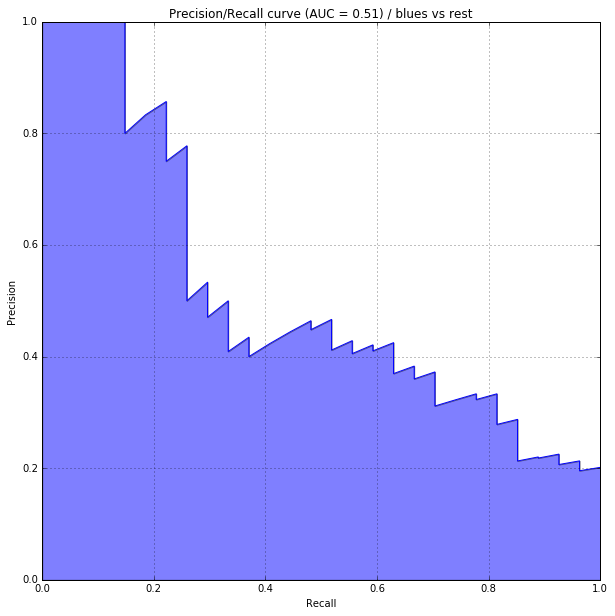

/Users/aa/Developer/miniconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


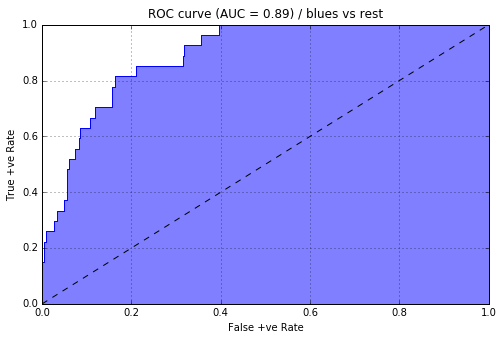

Plotting classical


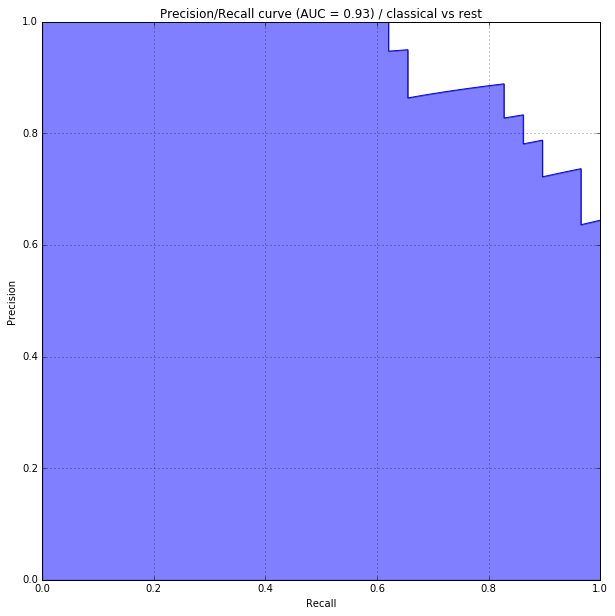

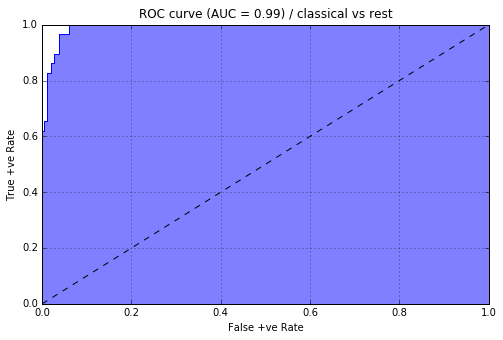

Plotting country


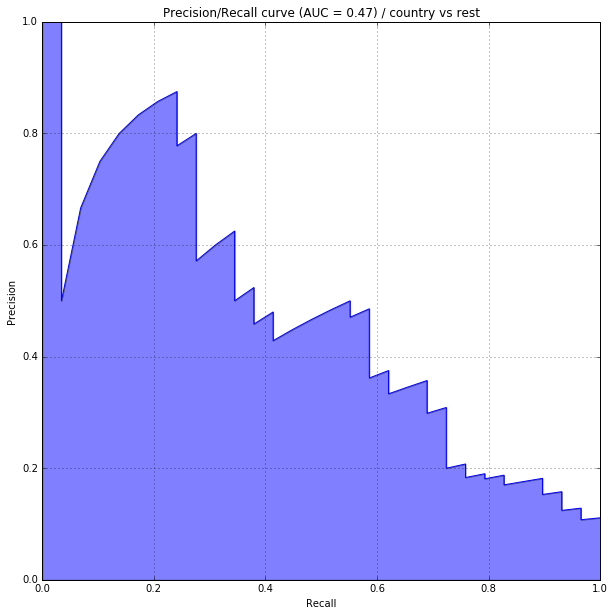

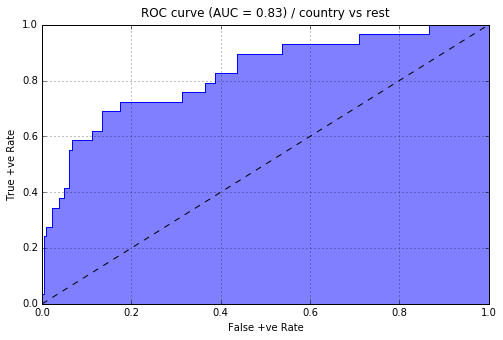

Plotting disco


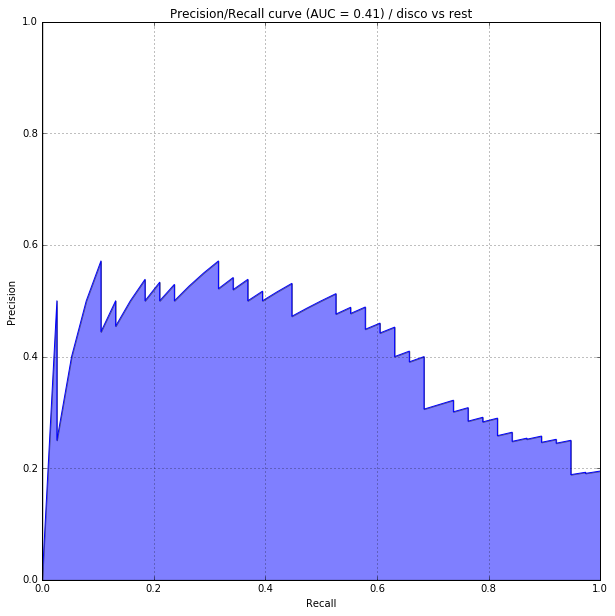

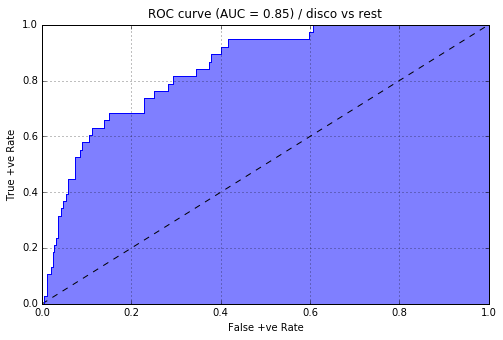

Plotting hiphop


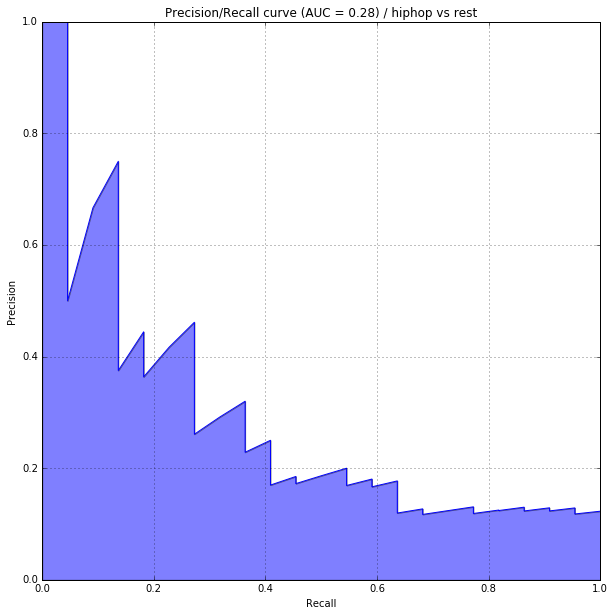

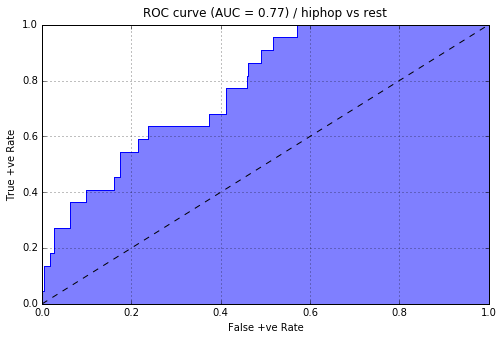

Plotting jazz


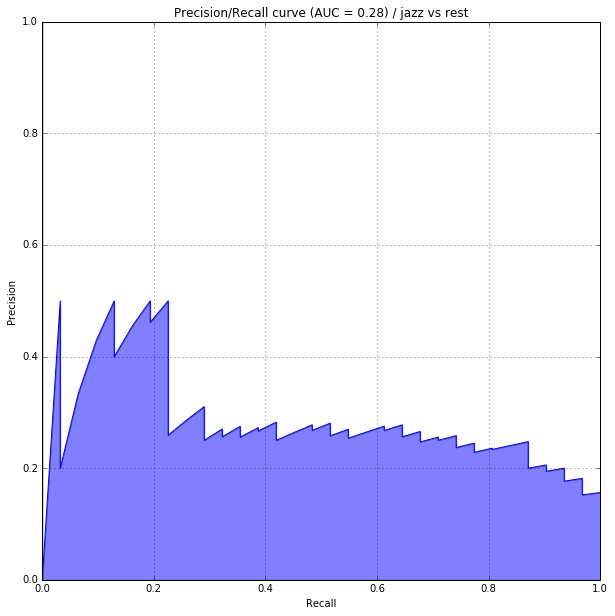

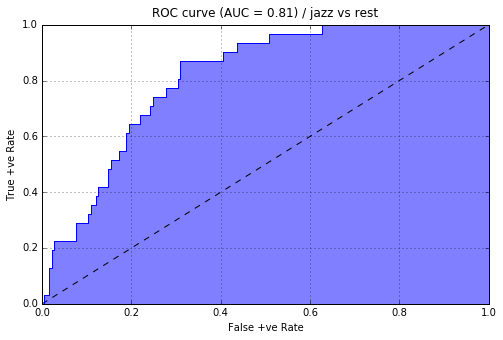

Plotting metal


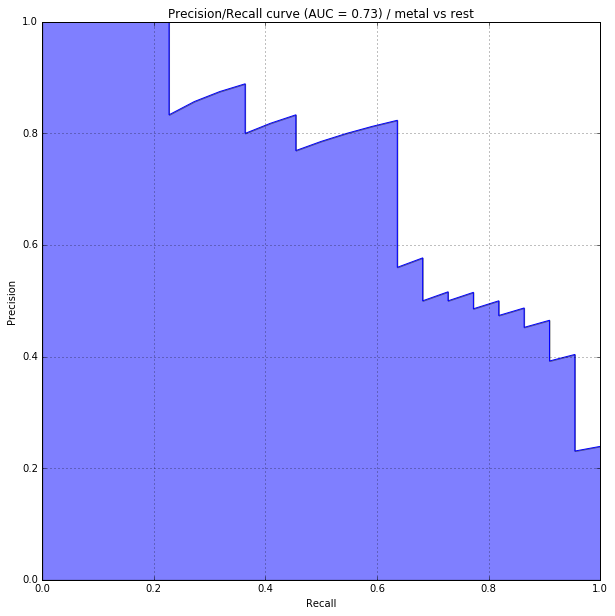

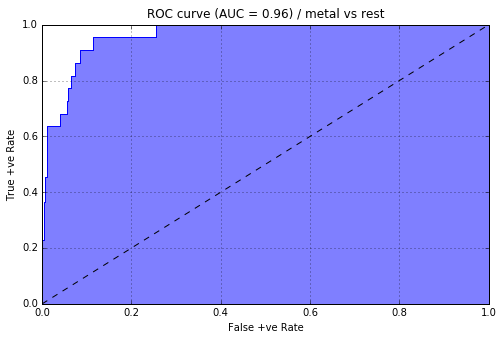

Plotting pop


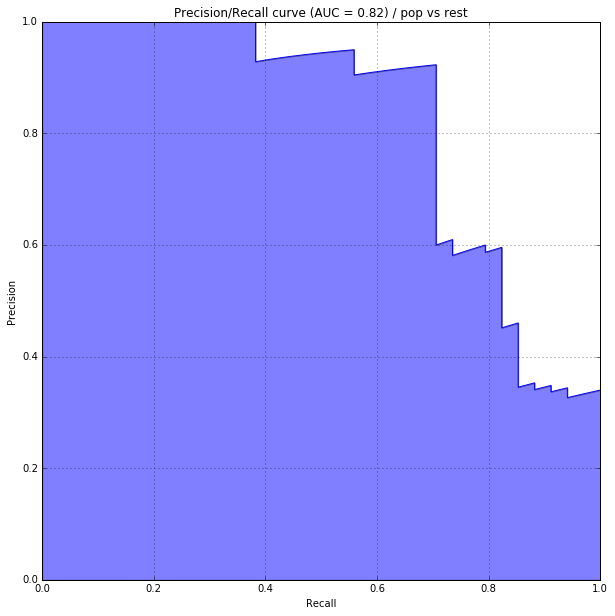

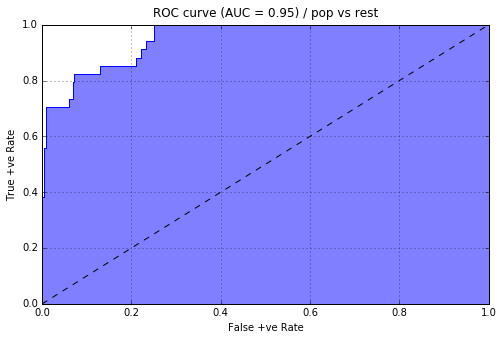

Plotting rock


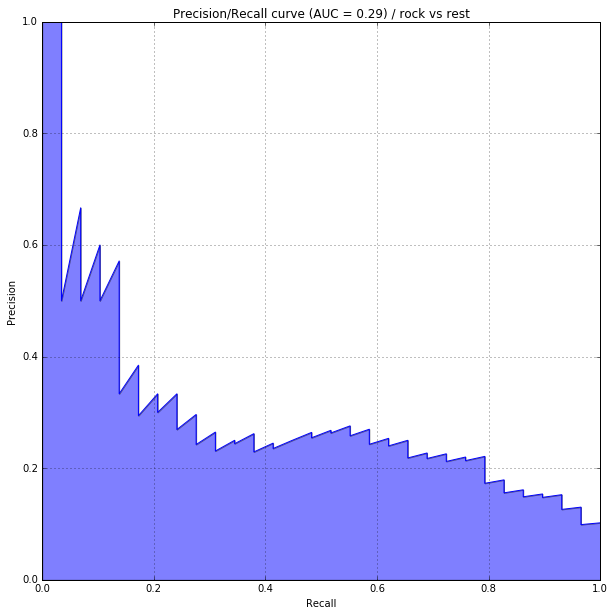

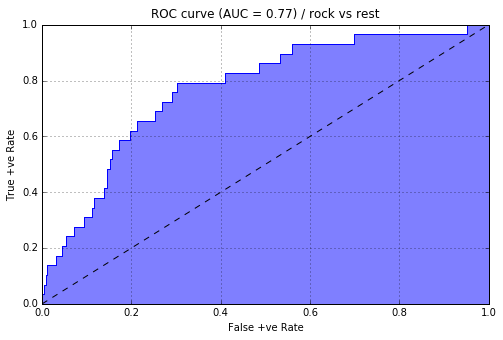

Plotting reggae


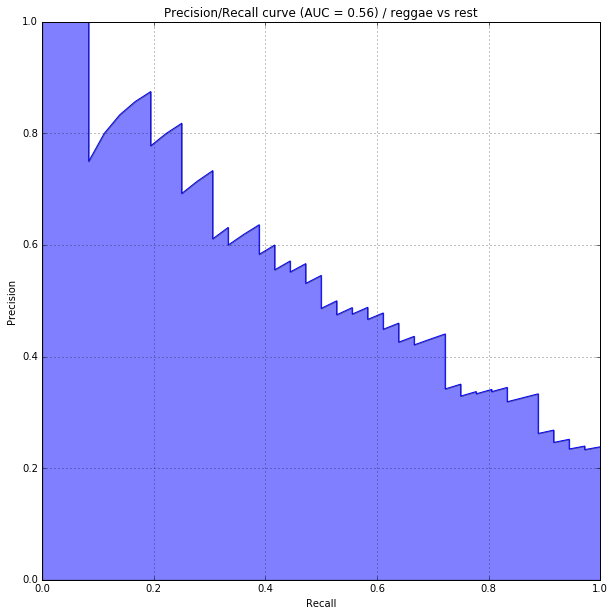

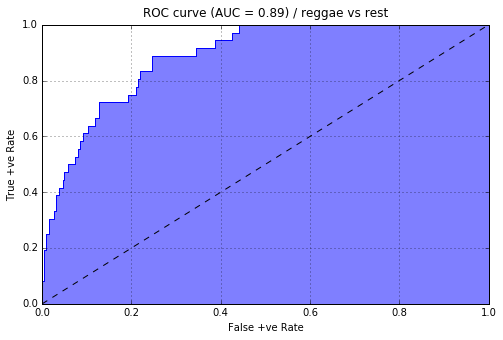

0.486	0.023	


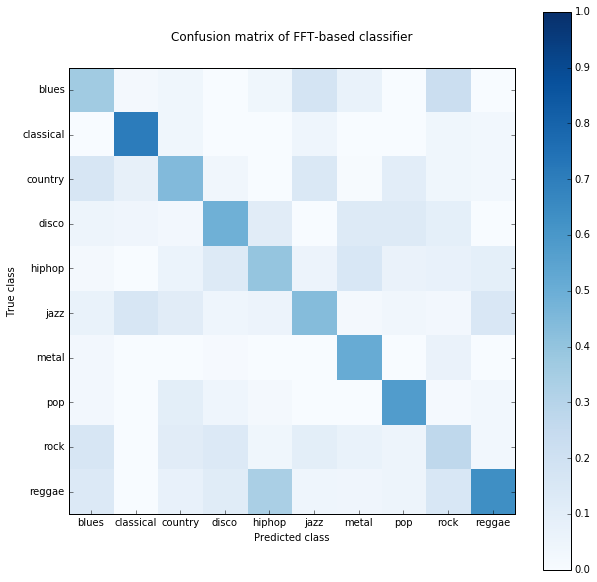

In [151]:
# Now run the MFCC-based classifier

clf = create_logreg_model()

train_avg, test_avg, cms = train_model(clf, 
                                      X2,   # CEPs files w/o NaN
                                      y2, 
                                      "Log Reg CEPS", plot=True)

cm_avg  = np.mean(cms, axis=0)
cm_norm = cm_avg / np.sum(cm_avg, axis=0)

plot_confusion_matrix(cm_norm, genre_list, "CEPS", 
                     "Confusion matrix of CEPS-based classifier")

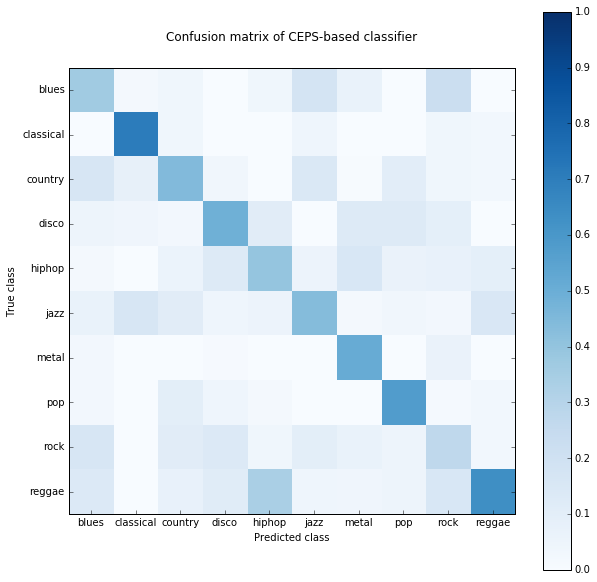

In [152]:
plot_confusion_matrix(cm_norm, genre_list, "CEPS", 
                     "Confusion matrix of CEPS-based classifier")

Ok, now this looks more like it! 

We have a much better confusion matrix -- with solid dark diagnola --, and great ROC curves.

So, we get better results with the MFCC CEPS than with just the FFTs